
## 00_Start_EDA
### EDA 시작하기

>### 01. 라이브러리 가져오기 Import Libraries
>### 02. 데이터 불러오기 Load Data
>### 03. 데이터 탐색하기 Explore Data
>### 04. 기술통계량 계산하기 Descriptive Statistics
>### 05. 단변량 분석 Univariate Analysis
>### 06. 이변량 분석 Bivariate Analysis
>### 07. 다변량 분석 Multivariate Analysis
>### 08. 이상치 탐지 Outlier Detection
>### 09. 데이터 변환 Data Transformation
>### 10. 결론 Conclusion

---

## 목적 1 : 치아 우식증에 영향을 주는 요인분석 및 이에 따른 합병증 문제

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas, numpy, matplotlib, seaborn 등 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno 

import warnings
warnings.filterwarnings('ignore')

- 데이터 조작 및 분석을 위해 pandas 라이브러리를 불러옴
- 수치 계산을 위해 Numpy 라이브러리를 불러옴
- 그래프와 플롯을 만들기 위해 Matplotlib과 seaborn 라이브러리를 불러옴
- 결측치 확인을 위해 missingno 라이브러리를 불러옴

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다. 
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.

In [2]:
nh= pd.read_csv('C:/Users/jisoo/Documents/분석 과제/data/nhis_nhcp_info_20211229.CSV', encoding = 'cp949')

### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [3]:
nh.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [4]:
nh.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29
999999,2020,1000000,28,1,11,160,55,76.1,2.0,2.0,...,0.9,17.0,13.0,24.0,2.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
nh_eng = nh.copy()

In [6]:
nh_eng = nh_eng.rename(columns={
    '기준년도': 'HCHK_YEAR',
    '가입자 일련번호': 'IDV_ID',
    '시도코드': 'SIDO',
    '성별코드': 'SEX',
    '연령대 코드(5세단위)': 'AGE_GROUP',
    '신장(5Cm단위)': 'HEIGHT',
    '체중(5Kg 단위)': 'WEIGHT',
    '허리둘레': 'WAIST',
    '시력(좌)': 'SIGHT_LEFT',
    '시력(우)': 'SIGHT_RIGHT',
    '청력(좌)': 'HEAR_LEFT',
    '청력(우)': 'HEAR_RIGHT',
    '수축기 혈압': 'BP_HIGH',
    '이완기 혈압': 'BP_LWST',
    '식전혈당(공복혈당)': 'BLDS',
    '총 콜레스테롤': 'TOT_CHOLE',
    '트리글리세라이드': 'TRIGLYCERIDE',
    'HDL 콜레스테롤': 'HDL_CHOLE',
    'LDL 콜레스테롤': 'LDL_CHOLE',
    '혈색소': 'HMG',
    '요단백': 'OLIG_PROTE_CD',
    '혈청크레아티닌': 'CREATININE',
    '(혈청지오티)AST': 'SGOT_AST',
    '(혈청지오티)ALT': 'SGOT_ALT',
    '감마 지티피': 'GAMMA_GTP',
    '흡연상태': 'SMK_STAT_TYPE_CD',
    '음주여부': 'DRK_YN',
    '구강검진 수검여부': 'HCHK_OE_INSPEC_YN',
    '치아우식증유무': 'CRS_YN',
    '치석': 'TTR_YN',
    '데이터 공개일자': 'DATA_STD_DT'
})

In [7]:
nh_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999892 non-null   float64
 8   SIGHT_LEFT         999743 non-null   float64
 9   SIGHT_RIGHT        999748 non-null   float64
 10  HEAR_LEFT          999778 non-null   float64
 11  HEAR_RIGHT         999770 non-null   float64
 12  BP_HIGH            992468 non-null   float64
 13  BP_LWST            992466 non-null   float64
 14  BLDS               992398 non-null   float64
 15  TOT_CHOLE          402306 non-nul

In [8]:
print("데이터 모형 \t", nh.shape)

print("\n컬럼별 타입")
print(nh.dtypes)

print("\n컬럼별 null값 존재여부")
print(nh.isnull().sum())

print("\n기준년도 목록 값")
print(list(set(nh['기준년도'])))

print("\n시도코드 목록")
print(list(set(nh['시도코드'])))

print("\n성별코드 목록 값")
print(list(set(nh['성별코드'])))

print("\n연령대 코드(5세단위) 목록 값")
print(list(set(nh['연령대 코드(5세단위)'])))

print("\n신장(5Cm단위)  목록 값")
print(list(set(nh['신장(5Cm단위)'])))

print("\n체중(5Kg 단위) 목록 값")
print(list(set(nh['체중(5Kg 단위)'])))

print("\n청력(좌)")
print(list(set(nh['청력(좌)'])))

print("\n청력(우)")
print(list(set(nh['청력(우)'])))

print("\n데이터 공개일자")
print(list(set(nh['데이터 공개일자'])))

데이터 모형 	 (1000000, 31)

컬럼별 타입
기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

컬럼별 null값 존재여부
기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)      

<AxesSubplot:>

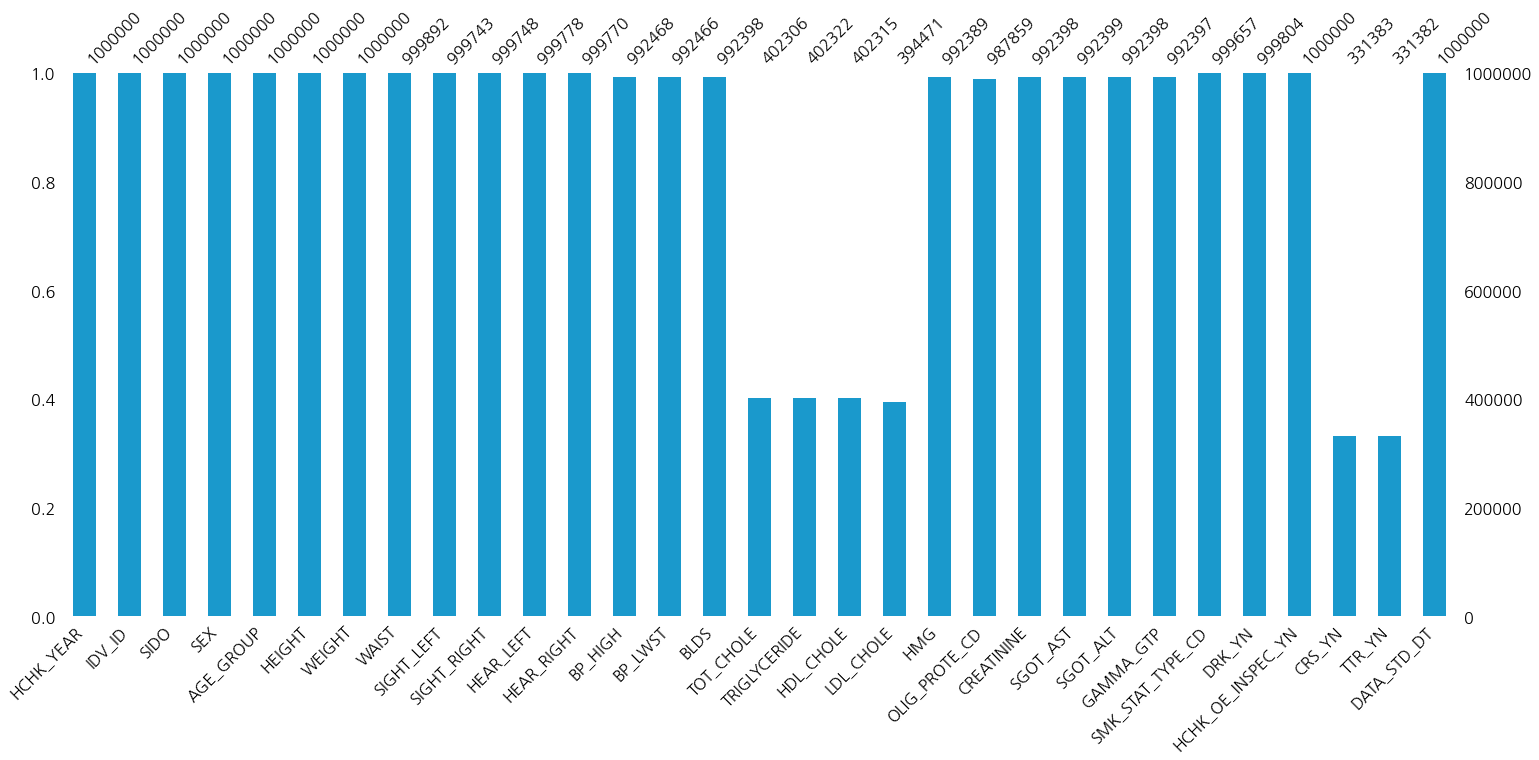

In [9]:
# 결측치
msno.bar(df=nh_eng,  color=(0.1, 0.6, 0.8))

In [10]:
nh_eng.iloc[:,2:-1]

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN
0,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN
1,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN
2,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN
3,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
4,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,...,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,41,2,13,145,55,81.0,0.9,1.0,1.0,1.0,...,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN
999996,26,2,12,160,55,76.5,1.5,1.5,1.0,1.0,...,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN
999997,48,1,9,175,70,85.0,1.2,1.2,1.0,1.0,...,1.0,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN
999998,48,2,9,160,70,91.0,0.6,0.5,1.0,1.0,...,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN


## ydata profiling
- ydata profiling은 데이터의 기초 통계량을 쉽고 빠르게 파악할 수 있으며, 데이터의 누락값, 중복값, 이상치 등을 간편하게 탐지할 수 있다.
- 또한, 변수 간 상관 관계나 분포의 형태 등을 쉽게 시각화하여 파악할 수 있어 데이터 전반적인 특성 파악에 유용함.

- 하지만, ydata profiling은 데이터의 크기가 크거나 복잡한 경우에는 시간이 많이 소요될 수 있음.
위의 경우에도 변수의 개수가 많다보니 시간이 굉장히 많이 소요됨.

In [11]:
#from ydata_profiling import ProfileReport
#ProfileReport(nh_eng.iloc[:,2:-1])

- 허리둘레의 최댓값 999값은 이상치인듯 하다.
- 허리둘레 항목은 아래의 콜레스테롤 항목처럼 2002년과 2007년까지 결측 처리되었다고 매뉴얼에는 적혀있으나,
- 정작 데이터에는 결측치가 전체 데이터에서 0.1% 미만이다.

- 시력(좌)와 시력(우) : 0.1~2.5 사이의 값으로 표기, 0.1 이하의 시력은 0.1, 실명은 9.9
- 청력(좌)와 청력(우) : 1(정상), 2(비정상)

- 식전 혈당의 최대값이 950이고 최솟값이 0이다. 현실적이지 못한 수치이다.
- 식전 혈당의 95%수치는 145 
- 식전 혈당 126 넘어가면 당뇨

- 총 콜레스테롤 : 정상치가 150 ~ 250. 데이터의 95%수치가 269. 1000, 2000 이런 수치는 현실적이지 않은 수치
- 트리글리세라이드 : 정상치는 30 ~ 130. 데이터의 95%수치가 294. 최댓값이 6999임. 1000을 넘어가는 이런 수치는 현실적이지 않음
- HDL 콜레스테롤 정상치는 30 ~ 65 , 95%수치가 83임. 최댓값 960 현실적이지 않은 수치
- LDL 콜레스테롤 170 이상이면 고LDL혈증으로 봄. 95% 수치가 179, 최댓값 2395, 현실적이지 않은 수치들이 있음

- 총 콜레스테롤, 트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤, 혈청크레아티닌은 결측치가 거의 60%이다. 
- 2008년 부터 건강검진 문진항목으로 추가되었기에 2002년부터 2007년 까지는 결측 처리 됨

- 혈색소 남성 정상수치 : 13.5-17.5g/dL 여성 정상수치 : 12.5-15.5g/dL 
- 요단백 : 소변에 단백질이 섞여 나오는 것, 1(-), 2(+-), 3(+1), 4(+2), 5(+3), 6(+4)
- 혈청크레아티닌 : 혈청 크레아티닌은 혈액검사를 통해 신장 기능을 평가하려 할 때 이용, 정상치 0.8 ~ 1.7
- 혈청크레아티닌의 95%수치가 1.2인데 최댓값이 95이다. 현실적이지 않은 수치이다.

- (혈청지오티)AST, (혈청지오티)ALT : 간세포가 손상될 때 나오는 효소이므로 수치가 높을수록 간기능이 떨어진다는 뜻, 정상치 0 ~ 40
- (혈청지오티)AST의 95% 수치가 49인데 최대값이 8712이다. 
- (혈청지오티)ALT의 95% 수치가 59인데 최대값이 5990이다.이상치임.
- 감마 지티피 : 알코올에 의한 간장애의 지표가 되는 검사, 정상치 : 남성 11 ~ 63, 여성 8 ~ 35
- 감마 지티피의 95%수치가 104인데 최대값이 2630이다. 이상치임.

- 흡연상태 : 1(피우지 않음), 2(이전에 피웠으나 끊음), 3(현재도 피움)
- 음주여부 : 0(마시지 않음), 1(마심)

- 구강검진 수검여부 : 0(미수검), 1(수검), 0(미수검)이 66.9%, 1(수검)이 33.1%
- 구강검진 수검여부에서 1(수검)인 33.1% 만 아래 검사결과가 존재
- 치아우식증유무 : 0(없음), 1(있음)
- 치아마모증 유무 : 0(없음), 1(있음)
- 치석 : 0(없음), 1(있음) 이라고 매뉴얼에는 표기되어있으나 매뉴얼에는 존재하지 않는 수치 2가 1.7% 존재함. 

### 04. 기술통계량 계산하기 Descriptive Statistics
- 데이터셋을 요약하기 위해 일부 기술통계량을 계산합니다.

In [12]:
nh_eng.iloc[:,3:-1].describe()

,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999892.000000,999743.000000,999748.000000,999778.000000,999770.000000,992468.000000,...,987859.000000,992398.000000,992399.000000,992398.000000,992397.000000,999657.000000,999804.000000,1000000.000000,331383.00000,331382.000000
mean,1.489311,11.917757,160.964085,63.060790,82.357094,0.933045,0.935036,1.046334,1.044071,124.831874,...,1.122333,0.851984,27.698337,26.759641,37.778292,1.557421,0.584800,0.331384,0.16859,0.584661
std,0.499886,2.171036,9.197899,12.269907,9.622632,0.637453,0.644911,0.218147,0.212804,14.751504,...,0.493386,0.369630,25.286659,25.835091,51.815871,0.783742,0.492757,0.470711,0.37439,0.589833
min,1.000000,9.000000,130.000000,30.000000,5.800000,0.100000,0.100000,1.000000,1.000000,64.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,...,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,...,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.00000,1.000000
75%,2.000000,13.000000,170.000000,70.000000,89.000000,1.200000,1.200000,1.000000,1.000000,134.000000,...,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000,1.000000,0.00000,1.000000
max,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,260.000000,...,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000,1.000000,1.00000,2.000000


- 위 결과에서, count, mean, std, min, 25%, 50%, 75%, max는 각각 데이터 개수, 평균, 표준편차, 최소값, 1사분위수, 중앙값, 3사분위수, 최대값을 의미함.

In [13]:
sido = {11:'서울특별시',26:'부산광역시', 27:'대구광역시', 28:'인천광역시',
        29:'광주광역시', 30:'대전광역시', 31:'울산광역시', 36:'세종특별자치시', 
        41:'경기도', 42:'강원도', 43:'충청북도', 44:'충청남도', 45:'전라북도',
        46:'전라남도', 47:'경상북도', 48:'경상남도', 49:'제주특별자치도'}

In [14]:
sido_val=nh['시도코드'].value_counts().to_frame()
sido_val=sido_val.reset_index().rename(columns ={'index':'시도코드','시도코드':'건수'})
sido_df = pd.DataFrame(list(sido.items()), columns=['시도코드', '시도명'])
pd.merge(sido_df, sido_val, on='시도코드', how='inner')

,시도코드,시도명,건수
0,11,서울특별시,166231
1,26,부산광역시,69025
2,27,대구광역시,48413
3,28,인천광역시,58345
4,29,광주광역시,28532
5,30,대전광역시,30057
6,31,울산광역시,26001
7,36,세종특별자치시,6460
8,41,경기도,247369
9,42,강원도,32023


In [15]:
print(nh['성별코드'].value_counts())

1    510689
2    489311
Name: 성별코드, dtype: int64


In [16]:
nh['연령대 코드(5세단위)'].value_counts().sort_index()

9     156277
10    144165
11    175705
12    142089
13    155096
14     86653
15     73714
16     36663
17     23401
18      6237
Name: 연령대 코드(5세단위), dtype: int64

In [17]:
nh['신장(5Cm단위)'].value_counts().sort_index()

130       379
135      2053
140     12373
145     50044
150    128555
155    181306
160    184993
165    179352
170    152585
175     79531
180     24312
185      4096
190       394
195        27
Name: 신장(5Cm단위), dtype: int64

In [18]:
nh['체중(5Kg 단위)'].value_counts().sort_index()

30        514
35       2939
40      16966
45      59642
50     124189
55     155762
60     158678
65     146024
70     123932
75      90047
80      56472
85      31641
90      16392
95       8414
100      4144
105      2112
110      1058
115       545
120       268
125       142
130        87
135        32
Name: 체중(5Kg 단위), dtype: int64

### 05. 단변량 분석 Univariate Analysis
- 히스토그램, 박스플롯 등을 그려 각 변수를 개별적으로 분석합니다.
- 각 변수의 특성과 분포들을 파악할 수 있습니다.(변수에 따라 통계적 유의성 검정도 진행할 수 있음)

In [19]:
sns.set(rc={'figure.figsize':(12,4)})

<AxesSubplot:>

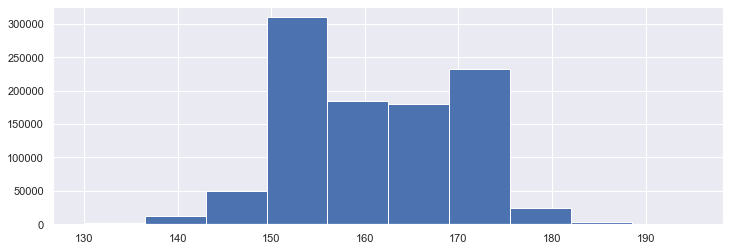

In [20]:
nh_eng['HEIGHT'].hist()

<AxesSubplot:xlabel='TOT_CHOLE', ylabel='Count'>

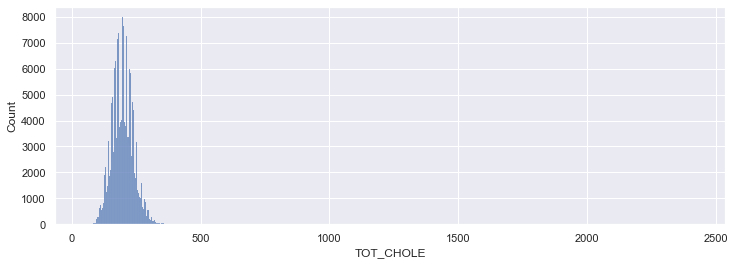

In [21]:
sns.histplot(nh_eng['TOT_CHOLE'].dropna())

<AxesSubplot:xlabel='BP_HIGH'>

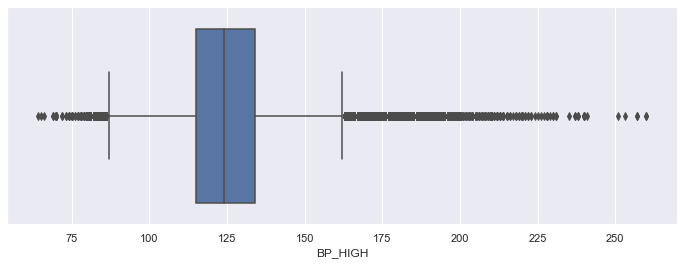

In [22]:
sns.boxplot(nh_eng['BP_HIGH'])

<AxesSubplot:xlabel='BP_LWST'>

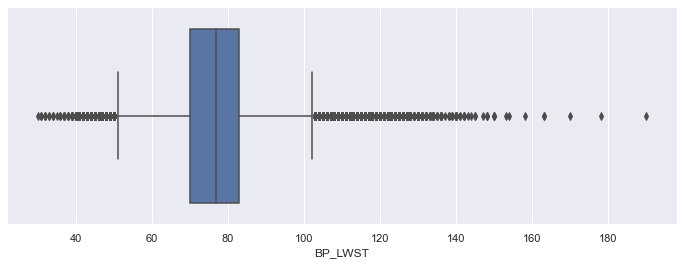

In [23]:
sns.boxplot(nh_eng['BP_LWST'])

<AxesSubplot:xlabel='AGE_GROUP'>

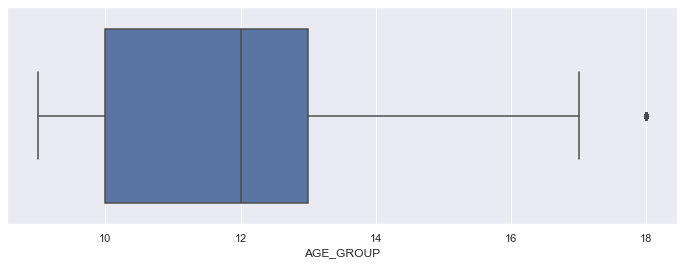

In [24]:
sns.boxplot(nh_eng['AGE_GROUP'])

<AxesSubplot:xlabel='WAIST'>

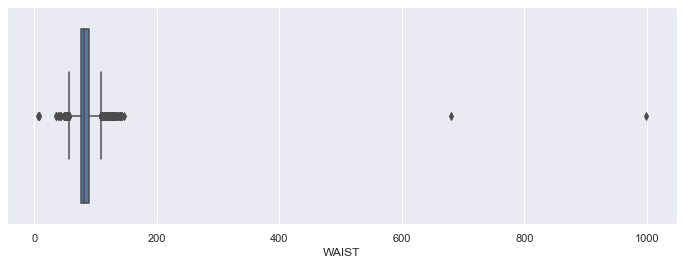

In [25]:
sns.boxplot(nh_eng['WAIST'])

### 06. 이변량 분석 Bivariate Analysis
- 산점도, 히트맵 등을 그려 두 변수 간의 관계를 분석합니다.
- 상관분석 / 회귀분석 등 또한 진행할 수 있습니다.
- 독립변수(x)와 종속변수(y)의 관계 혹은 독립변수(x1)와 독립변수(x2) 등 다양한 관계를 볼 수 있습니다.

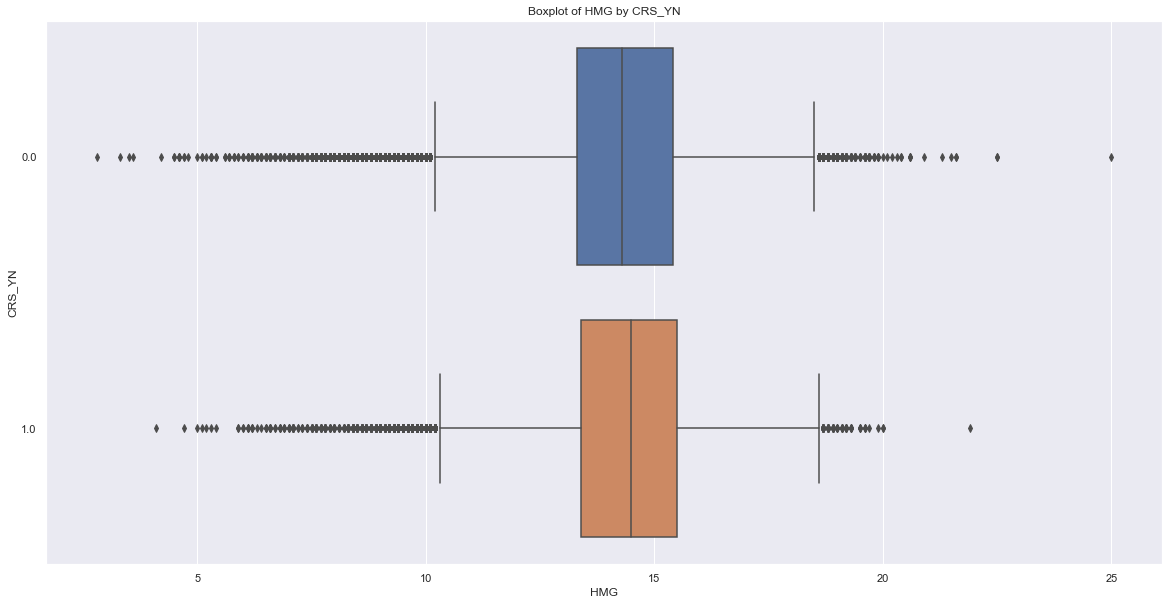

In [26]:
# 치아우식증 여부에 따른 헤모글로빈 수치 비교
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=nh_eng['HMG'], y=nh_eng['CRS_YN'] ,orient='h')
plt.ylabel('CRS_YN')  
plt.xlabel('HMG')  
plt.title('Boxplot of HMG by CRS_YN') 
plt.show()

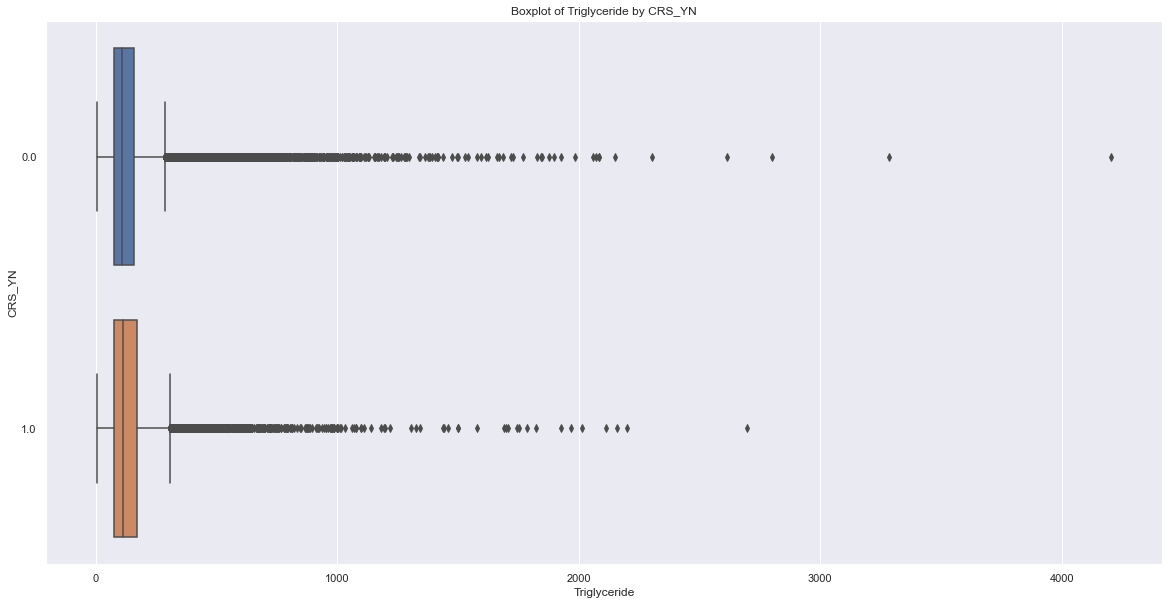

In [27]:
# 치아우식증 여부에 따른 트리글리세라이드 수치 비교
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=nh_eng['TRIGLYCERIDE'], y=nh_eng['CRS_YN'] ,orient='h')
plt.ylabel('CRS_YN')  
plt.xlabel('Triglyceride')  
plt.title('Boxplot of Triglyceride by CRS_YN') 
plt.show()

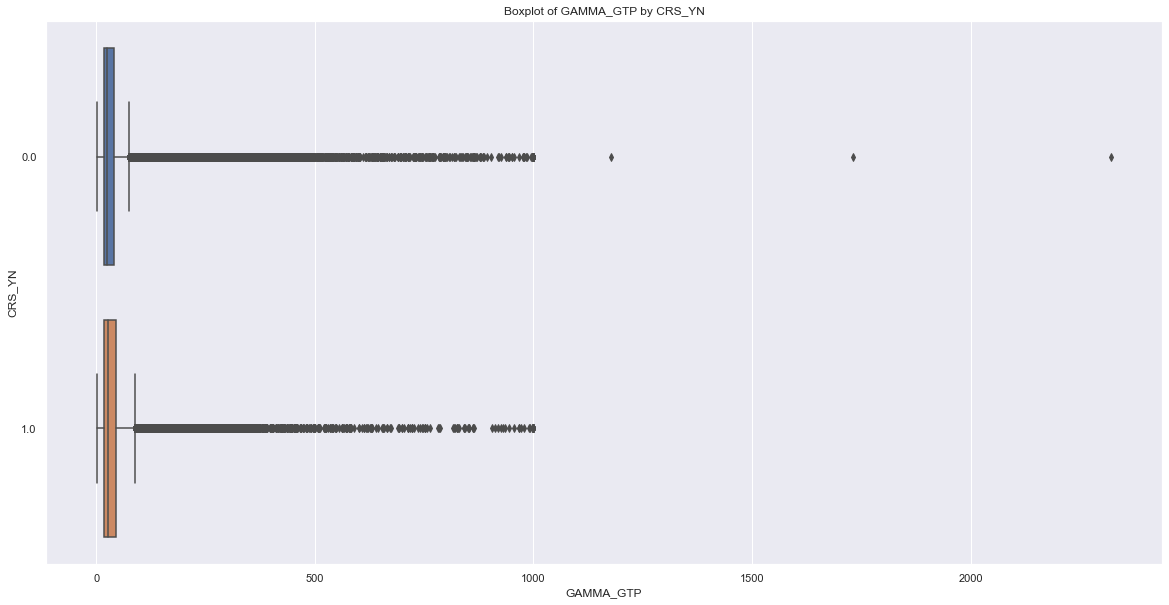

In [28]:
# 치아우식증 여부에 따른 감마지티피 비교
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=nh_eng['GAMMA_GTP'], y=nh_eng['CRS_YN'], orient='h')
plt.ylabel('CRS_YN')  # x 축 레이블 설정
plt.xlabel('GAMMA_GTP')  # y 축 레이블 설정
plt.title('Boxplot of GAMMA_GTP by CRS_YN')  # 그래프 제목 설정
plt.show()

In [29]:
# 치아우식증 여부에 따른 평균 건강상태의 차이
nh_eng.dropna(subset=['CRS_YN']).groupby('CRS_YN').mean().transpose()

CRS_YN,0.0,1.0
HCHK_YEAR,2020.000000,2020.000000
IDV_ID,500525.257485,499281.735376
SIDO,33.527242,34.548990
SEX,1.450139,1.394466
AGE_GROUP,11.624928,11.256820
HEIGHT,161.891603,162.760704
WEIGHT,63.910440,65.179888
WAIST,82.587297,83.180095
SIGHT_LEFT,0.936582,0.950808
SIGHT_RIGHT,0.933869,0.952408


## t-test 

In [30]:
nh_crs=nh_eng.dropna(subset=['CRS_YN'])
nh_crs

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD_DT
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
7,2020,8,41,1,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,3.0,0.0,1,0.0,2.0,2021-12-29
12,2020,13,41,1,14,175,80,90.0,0.8,0.7,...,0.8,21.0,21.0,41.0,3.0,1.0,1,0.0,0.0,2021-12-29
16,2020,17,30,1,11,160,65,90.0,0.6,0.6,...,1.0,29.0,54.0,24.0,1.0,1.0,1,0.0,1.0,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999981,2020,999982,26,1,12,165,90,108.2,0.6,0.8,...,1.0,25.0,19.0,48.0,2.0,1.0,1,1.0,2.0,2021-12-29
999982,2020,999983,27,2,9,160,50,67.9,1.5,1.2,...,0.6,17.0,9.0,8.0,1.0,1.0,1,1.0,1.0,2021-12-29
999988,2020,999989,26,1,16,165,60,81.0,0.8,0.8,...,1.0,21.0,16.0,13.0,2.0,1.0,1,0.0,1.0,2021-12-29
999990,2020,999991,11,2,13,155,50,73.0,0.3,0.4,...,0.6,21.0,17.0,16.0,1.0,0.0,1,0.0,1.0,2021-12-29


In [31]:
from scipy import stats
col = nh_crs.iloc[:, 4:-6].columns.to_list()

for i in col:
    col_0 = nh_crs[nh_crs['CRS_YN'] == 0][i].dropna()
    col_1 = nh_crs[nh_crs['CRS_YN'] == 1][i].dropna()
    
    # Shapiro-Wilk test for normality
    _, p1 = stats.shapiro(col_0)
    _, p2 = stats.shapiro(col_1)
    
    if p1 > 0.05 and p2 > 0.05:
        print(f'{i}는 정규성을 만족한다.----------*')
        print('------------------------------------')
    else:
        print(f'{i}는 정규성을 만족하지 않는다.')
        print('------------------------------------')

AGE_GROUP는 정규성을 만족하지 않는다.
------------------------------------
HEIGHT는 정규성을 만족하지 않는다.
------------------------------------
WEIGHT는 정규성을 만족하지 않는다.
------------------------------------
WAIST는 정규성을 만족하지 않는다.
------------------------------------
SIGHT_LEFT는 정규성을 만족하지 않는다.
------------------------------------
SIGHT_RIGHT는 정규성을 만족하지 않는다.
------------------------------------
HEAR_LEFT는 정규성을 만족하지 않는다.
------------------------------------
HEAR_RIGHT는 정규성을 만족하지 않는다.
------------------------------------
BP_HIGH는 정규성을 만족하지 않는다.
------------------------------------
BP_LWST는 정규성을 만족하지 않는다.
------------------------------------
BLDS는 정규성을 만족하지 않는다.
------------------------------------
TOT_CHOLE는 정규성을 만족하지 않는다.
------------------------------------
TRIGLYCERIDE는 정규성을 만족하지 않는다.
------------------------------------
HDL_CHOLE는 정규성을 만족하지 않는다.
------------------------------------
LDL_CHOLE는 정규성을 만족하지 않는다.
------------------------------------
HMG는 정규성을 만족하지 않는다.
------------------------------------
OLIG_PROTE

- 모든 변수가 정규성을 만족하지 않는다.

In [32]:
from scipy import stats
col=nh_crs.iloc[:,3:-6].columns.to_list()
for i in col:
    globals()[f'col_{i}_0'] = nh_crs[nh_crs['CRS_YN'] == 0][i].dropna()
    globals()[f'col_{i}_1'] = nh_crs[nh_crs['CRS_YN'] == 1][i].dropna()
    if f'col_{i}_0' in globals() and f'col_{i}_1' in globals():
        t, p = stats.ttest_ind(globals()[f'col_{i}_0'], globals()[f'col_{i}_1'], equal_var=False)
        print(f'{i}의 t-statistic: ', t)
        print(f'{i}의 p-value: ', p)
        if p < 0.05:  # 유의수준 0.05로 설정
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하다.--------******')
        else:
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하지 않다.')
        print('----------------------------------------')  

SEX의 t-statistic:  24.475797593147746
SEX의 p-value:  8.072852538587003e-132
치아우식증 여부에 따라 SEX의 평균의 차이는 유의하다.--------******
----------------------------------------
AGE_GROUP의 t-statistic:  39.5856826836128
AGE_GROUP의 p-value:  0.0
치아우식증 여부에 따라 AGE_GROUP의 평균의 차이는 유의하다.--------******
----------------------------------------
HEIGHT의 t-statistic:  -20.35738682199124
HEIGHT의 p-value:  6.859641064263599e-92
치아우식증 여부에 따라 HEIGHT의 평균의 차이는 유의하다.--------******
----------------------------------------
WEIGHT의 t-statistic:  -21.555295129491686
WEIGHT의 p-value:  9.440129418765651e-103
치아우식증 여부에 따라 WEIGHT의 평균의 차이는 유의하다.--------******
----------------------------------------
WAIST의 t-statistic:  -13.277753568791152
WAIST의 p-value:  3.442867098717179e-40
치아우식증 여부에 따라 WAIST의 평균의 차이는 유의하다.--------******
----------------------------------------
SIGHT_LEFT의 t-statistic:  -5.422332761007367
SIGHT_LEFT의 p-value:  5.9003457335619526e-08
치아우식증 여부에 따라 SIGHT_LEFT의 평균의 차이는 유의하다.--------******
---------------------

## Mann-Whitney U test

- 정규성과 등분산성을 만족할 필요가 없는 Mann-Whitney U test 
- 중앙값의 차이를 비교

In [33]:
col=nh_crs.iloc[:,3:-6].columns.to_list()
for i in col:
    globals()[f'col_{i}_0'] = nh_crs[nh_crs['CRS_YN'] == 0][i].dropna()
    globals()[f'col_{i}_1'] = nh_crs[nh_crs['CRS_YN'] == 1][i].dropna()
    if f'col_{i}_0' in globals() and f'col_{i}_1' in globals():
        u, p = stats.mannwhitneyu(globals()[f'col_{i}_0'], globals()[f'col_{i}_1'], alternative='two-sided')
        print(f'{i}의 U-statistic: ', u)
        print(f'{i}의 p-value: ', p)
        if p < 0.05:  # 유의수준 0.05로 설정
            print(f'치아우식증 여부에 따라 {i}의 중앙값은 통계적으로 유의미하게 다르다.--------******')
        else:
            print(f'치아우식증 여부에 따라 {i}의 중앙값은 통계적으로 유의미하게 다르지 않습니다.')
        print('----------------------------------------')

SEX의 U-statistic:  8124710905.0
SEX의 p-value:  4.8609353715342154e-129
치아우식증 여부에 따라 SEX의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
AGE_GROUP의 U-statistic:  8574279009.0
AGE_GROUP의 p-value:  0.0
치아우식증 여부에 따라 AGE_GROUP의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
HEIGHT의 U-statistic:  7269604319.5
HEIGHT의 p-value:  1.772199845592296e-97
치아우식증 여부에 따라 HEIGHT의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
WEIGHT의 U-statistic:  7278510802.5
WEIGHT의 p-value:  1.1551297903700942e-92
치아우식증 여부에 따라 WEIGHT의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
WAIST의 U-statistic:  7439224339.5
WAIST의 p-value:  3.0202938081569104e-35
치아우식증 여부에 따라 WAIST의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
SIGHT_LEFT의 U-statistic:  7538440431.0
SIGHT_LEFT의 p-value:  5.3265010689331516e-14
치아우식증 여부에 따라 SIGHT_LEFT의 중앙값은 통계적으로 유의미하게 다르다.--------******
-------

- 당황스러운 결과
- 거의 모든 변수가 통계적으로 유의함
- 성별에 따라 신장, 체중, 허리둘레, 헤모글로빈, 감마지티피 이런 변수들이 차이가 있음.
- 성별에 따라 치아우식증 여부에 차이가 있다보니 이로인해 신장, 무게, 허리둘레 이런 부분에서 차이가 있는 것이 아닐까(다중공선성 문제)
- 위의 문제를 해결해야함

### 07. 다변량 분석 Multivariate Analysis
- pairplot, 히트맵 등을 그려 두 변수 이상 간의 관계를 분석합니다.
- 회귀분석, 군집분석, 분산분석, 구조방정식 모델링 등 분석방법을 적용할 수 있습니다. 
- 상관계수 0.7기준으로 다중공선성을 확인하여 주성분분석(PCA) 등 적합한 방법을 통해 변수를 선택합니다.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

nh_eng_1 = nh_eng.copy()
nh_eng_1.fillna(nh_eng_1.median(), inplace=True)

# VIF 계산 함수
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# 독립변수(X)와 종속변수(y) 분리
X = nh_eng_1.iloc[:,3:-6] # 종속변수가 있는 열을 제외한 독립변수들
y = nh_eng_1['CRS_YN'] # 종속변수

# VIF 계산
vif_result = calculate_vif(X)

# VIF 결과 출력
print(vif_result)

         Features         VIF
0             SEX   15.085500
1       AGE_GROUP   49.571294
2          HEIGHT  277.097379
3          WEIGHT  132.947527
4           WAIST  253.658379
5      SIGHT_LEFT    3.467808
6     SIGHT_RIGHT    3.417839
7       HEAR_LEFT   34.667718
8      HEAR_RIGHT   36.095923
9         BP_HIGH  166.661299
10        BP_LWST  133.411276
11           BLDS   19.770298
12      TOT_CHOLE  738.694299
13   TRIGLYCERIDE   10.260527
14      HDL_CHOLE   60.879437
15      LDL_CHOLE  279.424438
16            HMG  139.609340
17  OLIG_PROTE_CD    6.441755
18     CREATININE    7.234160
19       SGOT_AST    5.161217
20       SGOT_ALT    5.248711
21      GAMMA_GTP    1.933932


- VIF(Variance Inflation Factor)는 회귀 분석에서 예측 변수들 간의 상관관계의 정도를 나타내는 다중공선성의 측정치이다.
- VIF 값이 10보다 크면 다중공선성의 존재를 나타낼 수 있습니다.

- 나이_그룹 (VIF = 49.571294)
- 키 (VIF = 277.097379)
- 몸무게 (VIF = 132.947527)
- 허리둘레 (VIF = 253.658379)
- 최고혈압 (VIF = 166.661299)
- 최저혈압 (VIF = 133.411276)
- 총콜레스테롤 (VIF = 738.694299)
- LDL콜레스테롤 (VIF = 279.424438)
- 혈색소 (VIF = 139.60934)

- 이러한 변수들은 다중공선성이 높을 가능성이 있다.

## 로지스틱 회귀분석
- 로지스틱 회귀(Logistic Regression)는 이진변수에 대해 다중공선성에 민감하지 않은 모델
- 위의 다중공선성이 높은 변수들이 존재하다보니 로지스틱 회귀분석 선택

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
nh_crs_drop=nh_crs.dropna()

### 치아우식증 여부를 알아내기 위한.
- 치아 검진 데이터가 포함

- 종속변수인 치아우식증 여부 변수가 불균형하기 때문에 SMOTE
- SMOTE를 사용하지 않을때는 예측시 0, 1 중에 모조리 0으로 예측

In [37]:
from imblearn.over_sampling import SMOTE

# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_crs_drop.iloc[:,3:-1].drop('CRS_YN', axis=1)  # 독립변수
y = nh_crs_drop['CRS_YN']  # 종속변수

# SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.6282530553558591
오차 행렬:
 [[12662  8158]
 [ 7355 13555]]


In [38]:
# 회귀계수 확인
coef = model.coef_
intercept = model.intercept_

print("회귀계수 (Coefficients):")
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {coef[0][i]}")
print(f"Intercept: {intercept[0]}")


# 상위 10개 독립변수 출력
top_10_idx = abs(coef).argsort(axis=1)[:, :-11:-1]
top_10_features = X.columns[top_10_idx]
print("상위 10개 독립변수:\n", top_10_features)

회귀계수 (Coefficients):
SEX: -0.07212872516785837
AGE_GROUP: -0.14476648341530413
HEIGHT: -8.927556003669756e-05
WEIGHT: -0.01701746261641636
WAIST: 0.020791658406846564
SIGHT_LEFT: -0.005601998537322016
SIGHT_RIGHT: -0.003998446074138481
HEAR_LEFT: 0.006060711420778166
HEAR_RIGHT: 0.005882985301030867
BP_HIGH: 0.004350929450239303
BP_LWST: 0.0030092481105555863
BLDS: 0.001578416269281694
TOT_CHOLE: 0.014790905857958794
TRIGLYCERIDE: -0.0030320217907528566
HDL_CHOLE: -0.018015431414336296
LDL_CHOLE: -0.014684310075857986
HMG: 0.010705929221634125
OLIG_PROTE_CD: 0.001182971866843932
CREATININE: -0.0002432647340342455
SGOT_AST: 0.007756334197376026
SGOT_ALT: -0.0077756496528460384
GAMMA_GTP: 0.0003536016335332794
SMK_STAT_TYPE_CD: 0.05360180305057381
DRK_YN: -0.002655106995539045
HCHK_OE_INSPEC_YN: 0.001062068172110285
TTR_YN: 0.16223770054448086
Intercept: 0.0010620699159372225
상위 10개 독립변수:
 [['TTR_YN' 'AGE_GROUP' 'SEX' 'SMK_STAT_TYPE_CD' 'WAIST' 'HDL_CHOLE'
  'WEIGHT' 'TOT_CHOLE' 'LDL_CHO

In [39]:
# 회귀식 구성
equation = "logit(p) = "
for i in range(len(X.columns)):
    equation += f"({coef[0][i]} * {X.columns[i]}) + "
equation += f"{intercept[0]}"
print("로지스틱 회귀식:\n", equation)

로지스틱 회귀식:
 logit(p) = (-0.07212872516785837 * SEX) + (-0.14476648341530413 * AGE_GROUP) + (-8.927556003669756e-05 * HEIGHT) + (-0.01701746261641636 * WEIGHT) + (0.020791658406846564 * WAIST) + (-0.005601998537322016 * SIGHT_LEFT) + (-0.003998446074138481 * SIGHT_RIGHT) + (0.006060711420778166 * HEAR_LEFT) + (0.005882985301030867 * HEAR_RIGHT) + (0.004350929450239303 * BP_HIGH) + (0.0030092481105555863 * BP_LWST) + (0.001578416269281694 * BLDS) + (0.014790905857958794 * TOT_CHOLE) + (-0.0030320217907528566 * TRIGLYCERIDE) + (-0.018015431414336296 * HDL_CHOLE) + (-0.014684310075857986 * LDL_CHOLE) + (0.010705929221634125 * HMG) + (0.001182971866843932 * OLIG_PROTE_CD) + (-0.0002432647340342455 * CREATININE) + (0.007756334197376026 * SGOT_AST) + (-0.0077756496528460384 * SGOT_ALT) + (0.0003536016335332794 * GAMMA_GTP) + (0.05360180305057381 * SMK_STAT_TYPE_CD) + (-0.002655106995539045 * DRK_YN) + (0.001062068172110285 * HCHK_OE_INSPEC_YN) + (0.16223770054448086 * TTR_YN) + 0.0010620699159

In [40]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):
TTR_YN: 0.16223770054448086
AGE_GROUP: -0.14476648341530413
SEX: -0.07212872516785837
SMK_STAT_TYPE_CD: 0.05360180305057381
WAIST: 0.020791658406846564
HDL_CHOLE: -0.018015431414336296
WEIGHT: -0.01701746261641636
TOT_CHOLE: 0.014790905857958794
LDL_CHOLE: -0.014684310075857986
HMG: 0.010705929221634125
SGOT_ALT: -0.0077756496528460384
SGOT_AST: 0.007756334197376026
HEAR_LEFT: 0.006060711420778166
HEAR_RIGHT: 0.005882985301030867
SIGHT_LEFT: -0.005601998537322016
BP_HIGH: 0.004350929450239303
SIGHT_RIGHT: -0.003998446074138481
TRIGLYCERIDE: -0.0030320217907528566
BP_LWST: 0.0030092481105555863
DRK_YN: -0.002655106995539045
BLDS: 0.001578416269281694
OLIG_PROTE_CD: 0.001182971866843932
HCHK_OE_INSPEC_YN: 0.001062068172110285
GAMMA_GTP: 0.0003536016335332794
CREATININE: -0.0002432647340342455
HEIGHT: -8.927556003669756e-05


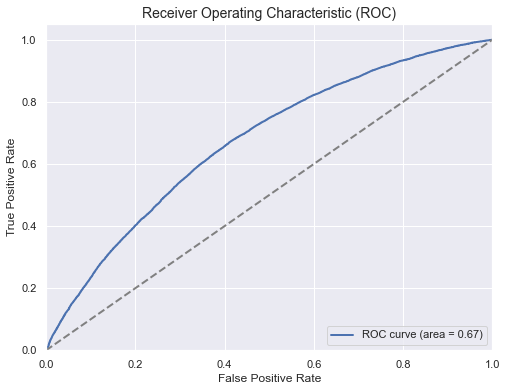

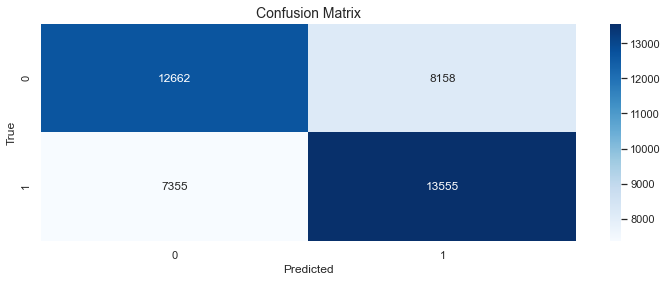

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ROC 곡선 그리기
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix 그리기
confusion_mat = confusion_matrix(y_test, y_pred)
labels = ['0', '1']
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### 치아우식증 여부를 알아내기 위한.
- 치아 검진 데이터 불포함

In [42]:
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_crs_drop.iloc[:,3:-4]# 독립변수
y = nh_crs_drop['CRS_YN']  # 종속변수

# SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.5986101126288043
오차 행렬:
 [[12078  8742]
 [ 8008 12902]]


In [43]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):
AGE_GROUP: -0.1309838753672673
SEX: -0.03589996193916372
SMK_STAT_TYPE_CD: 0.031011500269990524
HDL_CHOLE: -0.017735064184119347
WAIST: 0.017638315982244267
WEIGHT: -0.01698398410642706
TOT_CHOLE: 0.014433705345099903
LDL_CHOLE: -0.01442802115874251
HMG: 0.008045614306121275
BP_HIGH: 0.0056578360403109935
TRIGLYCERIDE: -0.0029563731113188036
DRK_YN: 0.0027814394880871615
HEIGHT: 0.002752473619441531
SGOT_ALT: -0.002547563888539723
SGOT_AST: 0.0016957386961594335
BP_LWST: -0.0016461251404043874
BLDS: 0.001632986593411557
HEAR_LEFT: 0.0011061083050666201
HEAR_RIGHT: 0.0010566862611807136
CREATININE: -0.0008311958113006972
SIGHT_LEFT: -0.0006491179970129187
GAMMA_GTP: 0.0004455893571769192
OLIG_PROTE_CD: 0.00042494021016902634
SIGHT_RIGHT: 0.0001521997536868905


- 치아우식증 여부를 알아내기 위한 로지스틱 회귀분석을 실시하였다.
- 치아검진 여부를 제외한 분석에서 가장높은 회귀계수의 변수는 연령대이다.
- 그래서 연령대 별 건강상태에 차이가 있는가

In [44]:
# 연령대 별 건강상태 차이
nh_eng.dropna(subset=['AGE_GROUP']).groupby('AGE_GROUP').mean().transpose()

AGE_GROUP,9,10,11,12,13,14,15,16,17,18
HCHK_YEAR,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
IDV_ID,499718.979652,498804.955905,500233.247039,499817.242468,500883.408876,500520.840906,501456.518083,499641.092900,497104.209222,498893.272407
SIDO,34.077555,34.312891,34.166603,34.218961,33.732417,33.407614,33.567680,34.107138,35.398957,36.909732
SEX,1.434114,1.450123,1.492394,1.496471,1.519272,1.510265,1.519087,1.535308,1.554164,1.626423
HEIGHT,165.665453,164.119689,162.111551,160.653006,159.128217,157.810347,156.577041,154.966042,153.267382,150.440115
WEIGHT,67.240221,65.677141,63.903674,62.595556,61.504197,60.789298,59.730784,58.025530,55.841417,51.026134
WAIST,81.683779,81.405677,81.477849,81.969639,82.676796,83.763746,84.365494,84.680074,84.442829,82.103564
SIGHT_LEFT,1.074190,1.013562,0.974431,0.940721,0.876169,0.817555,0.784676,0.764188,0.725754,0.737647
SIGHT_RIGHT,1.070411,1.011263,0.976357,0.943622,0.880179,0.824614,0.792073,0.757936,0.749793,0.745669
HEAR_LEFT,1.007226,1.011309,1.017728,1.029698,1.046908,1.072058,1.117630,1.175946,1.238211,1.324615


- 40 ~ 44세가 음주를 가장 많이함, 
- 그에 따라 알코올에 의한 간장애의 지표가 되는 검사인 감마지티피도 두번째로 높음.
- 치석 여부도 가장 높음. 치아 우식증 여부도 가장높음
- 흡연 여부도 가장 높음.
- 위의 로지스틱 회귀분석을 통해 치아우식증에 가장 높은 독립변수가 연령대와 흡연 여부 였는데
- 40 ~ 44세가 흡연 비율이 높다 보니 치석 여부와 치아 우식증 여부가 높은게 아닐까라는  

In [45]:
# 치아우식증 유무별 건강 통계분석 - 상관관계
# 상관관계 계산
correlation = nh_eng.corr()

# 치아우식증과 다른 변수들의 상관관계 확인
corr_with_crs = correlation['CRS_YN']
corr_with_crs = corr_with_crs.drop('CRS_YN')  # 자기 자신과의 상관관계는 제외
corr_with_crs = corr_with_crs.abs().sort_values(ascending=False)  # 절댓값으로 정렬

# 상관관계가 높은 순서대로 상위 5개 변수 출력
top_5_corr = corr_with_crs.head(5)
print("치아우식증과 상관관계가 높은 상위 5개 변수:\n", top_5_corr)

치아우식증과 상관관계가 높은 상위 5개 변수:
 TTR_YN              0.196068
SMK_STAT_TYPE_CD    0.074606
AGE_GROUP           0.068458
SEX                 0.041983
GAMMA_GTP           0.039929
Name: CRS_YN, dtype: float64


#### 치아우식증 여부와 상관관계가 높은 변수들 순서대로 5개
- 치석여부
- 흡연 여부
- 연령대
- 성별
- 감마GPT

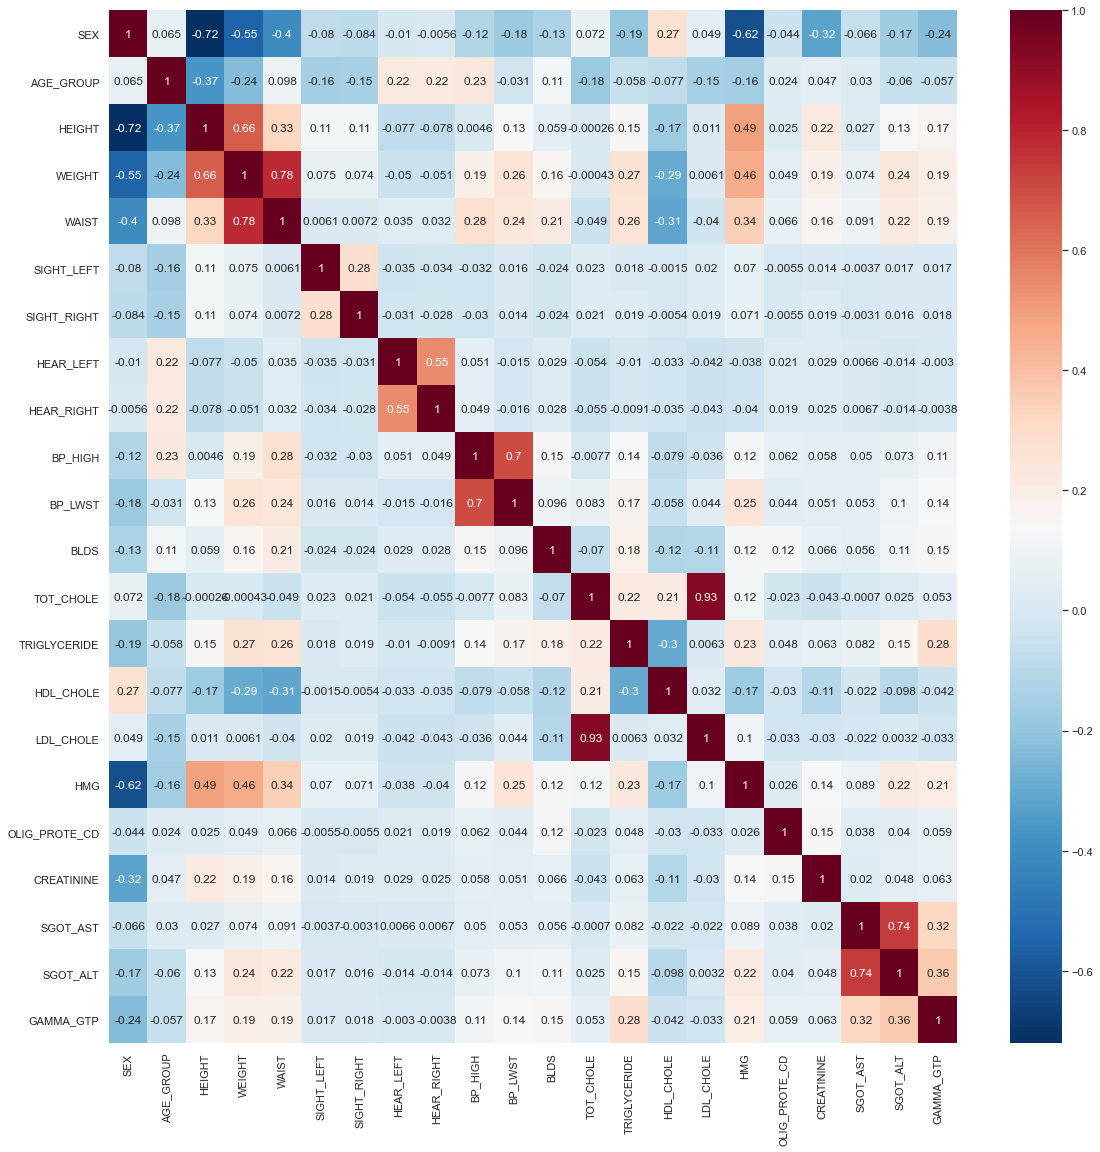

In [46]:
# 히트맵
nh_corr=nh_eng.iloc[:,3:-6].corr(method='pearson')
fig, ax = plt.subplots(figsize=(19, 19))
sns.heatmap(nh_corr, xticklabels=nh_corr.columns, yticklabels=nh_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

- 성별과 신장, 체중, 허리둘레, 헤모글로빈에 상관관계가 있는 편
- 체중과 신장 간에 상관관계 0.6619 
- 체중과 허리둘레 간에 상관관계 0.7840
- 수축기 혈압과 이완기 혈압 간에 상관관계 0.7001
- 총 콜레스테롤과 LDL콜레스테롤 간에 상관관계 0.9268
- (혈청지오티)AST과 (혈청지오티)ALT간에 상관관계 0.7419

### 08. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

### 09. 데이터 변환 Data Transformation
- 스케일링, 인코딩, 결측치 처리 등을 적용하여 데이터를 변환합니다.
- 각 데이터의 특성에 따라 처리방법에 대하여 적합한 방법을 선택합니다.
- 스케일링 방법 
>- Min-Max Scaling : 데이터를 최소값과 최대값을 이용하여 0과 1 사이의 범위로 조정하는 방법입니다.
>- Standard Scaling : 데이터의 평균값과 표준편차를 이용하여 표준정규분포 형태로 조정하는 방법입니다.
>- MaxAbs Scaling : 데이터의 최대절대값을 이용하여 -1과 1 사이의 범위로 조정하는 방법입니다.
>- Robust Scaling : Median과 Interquartile range(IQR)를 이용하여 이상치(outlier)에 영향을 받지 않고 Scaling하는 방법입니다.
>- Power Transform : 데이터의 분포가 비대칭(skewed)한 경우, 분포를 정규분포와 같은 형태로 조정하는 방법입니다.
- 인코딩 방법(범주형 변수)
>- One-hot Encoding : 범주형 변수를 이진형 변수로 변환하는 방법입니다. 2개 이상인 경우에는 사용하는 것이 좋습니다.
>- Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여하는 방법입니다. 정수값이 모델에 영향을 미칠 수 있지만 변수의 값이 매우 많은 경우에는 고려해볼 수도 있습니다.
- 결측치 처리 방법
>- 결측치가 있는 데이터 행 삭제 : 결측치가 있는 데이터 행을 삭제하는 방법입니다. 하지만 이 경우 데이터의 양이 많지 않을 때는 유용할 수 있지만, 결측치가 많은 경우 데이터의 손실이 크게 일어날 수 있습니다.
>- 평균값으로 대체: 결측치가 있는 특성의 평균값으로 결측치를 대체하는 방법입니다. 이 방법은 결측치가 일부인 경우 유용할 수 있습니다.
>- 중앙값으로 대체: 결측치가 있는 특성의 중앙값으로 결측치를 대체하는 방법입니다. 이 방법은 이상치가 있을 때 유용할 수 있습니다.
>- 최빈값으로 대체: 결측치가 있는 특성의 최빈값으로 결측치를 대체하는 방법입니다. 이 방법은 범주형 데이터에서 유용합니다.
>- 다른 특성의 값으로 대체: 다른 특성의 값에 따라 결측치를 대체하는 방법입니다. 예를 들어, 같은 그룹에 속한 데이터들의 평균값으로 결측치를 대체하는 것입니다.
>- 모델링을 통한 대체: 다른 특성을 이용하여 결측치를 예측하는 모델을 구축하여 결측치를 대체하는 방법입니다. 이 방법은 데이터 양이 많은 경우에 유용합니다.

In [13]:
nh_x = nh_eng.copy()

In [14]:
# 시력에서 실명을 9.9로 표기 했는데 이를 0으로 치환
# 결측치를 최빈값으로 대체
nh_x['SIGHT_LEFT'].replace(9.9, 0, inplace=True)
nh_x['SIGHT_RIGHT'].replace(9.9, 0, inplace=True)
nh_x['SIGHT_LEFT'].fillna(nh_x['SIGHT_LEFT'].mode()[0], inplace=True)
nh_x['SIGHT_RIGHT'].fillna(nh_x['SIGHT_RIGHT'].mode()[0], inplace=True)

print("처리 전 데이터 :\n",nh_eng['SIGHT_LEFT'].describe())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['SIGHT_LEFT'].describe())
print('--------------------------------------------------')
print("처리 전 데이터 :\n",nh_eng['SIGHT_RIGHT'].describe())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['SIGHT_RIGHT'].describe())

처리 전 데이터 :
 count    999743.000000
mean          0.933045
std           0.637453
min           0.100000
25%           0.700000
50%           0.900000
75%           1.200000
max           9.900000
Name: SIGHT_LEFT, dtype: float64
--------------------------------------------------
이상치 처리 후의 데이터 :
 count    1000000.000000
mean           0.896205
std            0.329809
min            0.000000
25%            0.700000
50%            0.900000
75%            1.200000
max            2.500000
Name: SIGHT_LEFT, dtype: float64
--------------------------------------------------
처리 전 데이터 :
 count    999748.000000
mean          0.935036
std           0.644911
min           0.100000
25%           0.700000
50%           0.900000
75%           1.200000
max           9.900000
Name: SIGHT_RIGHT, dtype: float64
--------------------------------------------------
이상치 처리 후의 데이터 :
 count    1000000.000000
mean           0.896828
std            0.327736
min            0.000000
25%            0.700000
50%      

In [15]:
# 청력에서 1(정상), 2(비정상)이다. 
# 하지만 데이터에 3이라는 수치가 있는데 이를 1(정상)으로 치환
# 결측치도 1로 치환
nh_x['HEAR_LEFT'].replace(3, 1, inplace=True)
nh_x['HEAR_RIGHT'].replace(3, 1, inplace=True)
nh_x['HEAR_LEFT'].fillna(nh_x['HEAR_LEFT'].mode()[0], inplace=True)
nh_x['HEAR_RIGHT'].fillna(nh_x['HEAR_RIGHT'].mode()[0], inplace=True)

print("처리 전 데이터 :\n",nh_eng['HEAR_LEFT'].value_counts())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['HEAR_LEFT'].value_counts())
print('--------------------------------------------------')
print("처리 전 데이터 :\n",nh_eng['HEAR_RIGHT'].value_counts())
print('--------------------------------------------------')
print("이상치 처리 후의 데이터 :\n",nh_x['HEAR_RIGHT'].value_counts())

처리 전 데이터 :
 1.0    955154
2.0     42924
3.0      1700
Name: HEAR_LEFT, dtype: int64
--------------------------------------------------
이상치 처리 후의 데이터 :
 1.0    957076
2.0     42924
Name: HEAR_LEFT, dtype: int64
--------------------------------------------------
처리 전 데이터 :
 1.0    957287
2.0     40905
3.0      1578
Name: HEAR_RIGHT, dtype: int64
--------------------------------------------------
이상치 처리 후의 데이터 :
 1.0    959095
2.0     40905
Name: HEAR_RIGHT, dtype: int64


In [16]:
# 치석
# 0(없음), 1(있음) 이라고 매뉴얼에는 표기되어있으나 매뉴얼에는 존재하지 않는 수치 2가 1.7% 존재함
nh_x['TTR_YN'].value_counts()

1.0    158928
0.0    155045
2.0     17409
Name: TTR_YN, dtype: int64

In [17]:
# 2를 결측치 처리함.
nh_x['TTR_YN'].replace(2, np.nan, inplace=True)
print("이상치 처리 후의 결측치 :",nh_x['TTR_YN'].isnull().sum())
print("원데이터의 결측치 :",nh_eng['TTR_YN'].isnull().sum())

이상치 처리 후의 결측치 : 686027
원데이터의 결측치 : 668618


- 치석 컬럼은 0(없음), 1(있음) 이라고 매뉴얼에는 표기되어있으나 매뉴얼에는 존재하지 않는 수치 2가 1.7% 존재함
- 0과 1의 비율이 거의 같음
- 이상치는 결측치 처리

In [18]:
# 요단백 수치
# 결측치를 최빈값으로 대체
nh_x['OLIG_PROTE_CD'].fillna(nh_x['OLIG_PROTE_CD'].mode()[0], inplace=True)
nh_x['OLIG_PROTE_CD'].fillna(nh_x['OLIG_PROTE_CD'].mode()[0], inplace=True)
print("처리 전의 결측치 :",nh_eng['OLIG_PROTE_CD'].isnull().sum())
print("처리 전 데이터 :\n",nh_eng['OLIG_PROTE_CD'].value_counts())
print('--------------------------------------------------')
print("처리 후의 결측치 :",nh_x['OLIG_PROTE_CD'].isnull().sum())
print("처리 후의 데이터 :\n",nh_x['OLIG_PROTE_CD'].value_counts())

처리 전의 결측치 : 12141
처리 전 데이터 :
 1.0    914825
2.0     39974
3.0     22219
4.0      7652
5.0      2465
6.0       724
Name: OLIG_PROTE_CD, dtype: int64
--------------------------------------------------
처리 후의 결측치 : 0
처리 후의 데이터 :
 1.0    926966
2.0     39974
3.0     22219
4.0      7652
5.0      2465
6.0       724
Name: OLIG_PROTE_CD, dtype: int64


In [19]:
# 흡연 여부
# 결측치를 최빈값으로 대체
nh_x['SMK_STAT_TYPE_CD'].fillna(nh_x['SMK_STAT_TYPE_CD'].mode()[0], inplace=True)
nh_x['SMK_STAT_TYPE_CD'].fillna(nh_x['SMK_STAT_TYPE_CD'].mode()[0], inplace=True)
print("처리 전의 결측치 :",nh_eng['SMK_STAT_TYPE_CD'].isnull().sum())
print("처리 전 데이터 :\n",nh_eng['SMK_STAT_TYPE_CD'].value_counts())
print('--------------------------------------------------')
print("처리 후의 결측치 :",nh_x['SMK_STAT_TYPE_CD'].isnull().sum())
print("처리 후의 데이터 :\n",nh_x['SMK_STAT_TYPE_CD'].value_counts())

처리 전의 결측치 : 343
처리 전 데이터 :
 1.0    626138
2.0    189808
3.0    183711
Name: SMK_STAT_TYPE_CD, dtype: int64
--------------------------------------------------
처리 후의 결측치 : 0
처리 후의 데이터 :
 1.0    626481
2.0    189808
3.0    183711
Name: SMK_STAT_TYPE_CD, dtype: int64


In [20]:
# 음주 여부
# 결측치를 최빈값으로 대체
nh_x['DRK_YN'].fillna(nh_x['DRK_YN'].mode()[0], inplace=True)
nh_x['DRK_YN'].fillna(nh_x['DRK_YN'].mode()[0], inplace=True)
print("처리 전의 결측치 :",nh_eng['DRK_YN'].isnull().sum())
print("처리 전 데이터 :\n",nh_eng['DRK_YN'].value_counts())
print('--------------------------------------------------')
print("처리 후의 결측치 :",nh_x['DRK_YN'].isnull().sum())
print("처리 후의 데이터 :\n",nh_x['DRK_YN'].value_counts())

처리 전의 결측치 : 196
처리 전 데이터 :
 1.0    584685
0.0    415119
Name: DRK_YN, dtype: int64
--------------------------------------------------
처리 후의 결측치 : 0
처리 후의 데이터 :
 1.0    584881
0.0    415119
Name: DRK_YN, dtype: int64


In [21]:
# 수치형 변수 리스트
col = nh_x.iloc[:, 12:-6].columns.to_list()
col.remove('OLIG_PROTE_CD')
col.append('WAIST')
col

['BP_HIGH',
 'BP_LWST',
 'BLDS',
 'TOT_CHOLE',
 'TRIGLYCERIDE',
 'HDL_CHOLE',
 'LDL_CHOLE',
 'HMG',
 'CREATININE',
 'SGOT_AST',
 'SGOT_ALT',
 'GAMMA_GTP',
 'WAIST']

In [22]:
for c in col:
    # Calculate IQR
    Q1 = nh_x[c].quantile(0.01)
    Q3 = nh_x[c].quantile(0.99)
    IQR = Q3 - Q1
    
    # Detect outliers and replace with median
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    nh_x[c] = np.where((nh_x[c] < lower_bound) | (nh_x[c] > upper_bound)| nh_x[c].isnull() , nh_x[c].median(), nh_x[c])

    print(f'######{c}######----------')
    print("처리 전 데이터 :\n", nh_eng[c].describe())
    print("이상치 처리 후의 데이터 :\n", nh_x[c].describe())
    print('--------------------------------------------------')

######BP_HIGH######----------
처리 전 데이터 :
 count    992468.000000
mean        124.831874
std          14.751504
min          64.000000
25%         115.000000
50%         124.000000
75%         134.000000
max         260.000000
Name: BP_HIGH, dtype: float64
이상치 처리 후의 데이터 :
 count    1000000.000000
mean         124.825608
std           14.696021
min           64.000000
25%          115.000000
50%          124.000000
75%          134.000000
max          260.000000
Name: BP_HIGH, dtype: float64
--------------------------------------------------
######BP_LWST######----------
처리 전 데이터 :
 count    992466.000000
mean         76.815972
std           9.990877
min          30.000000
25%          70.000000
50%          77.000000
75%          83.000000
max         190.000000
Name: BP_LWST, dtype: float64
이상치 처리 후의 데이터 :
 count    1000000.000000
mean          76.817144
std            9.952025
min           30.000000
25%           70.000000
50%           77.000000
75%           83.000000
max          

- 수치형 변수들의 이상치는 상한과 하한으로 결측치들을 중앙값으로 대체

In [23]:
nh_x.isnull().sum()

HCHK_YEAR                 0
IDV_ID                    0
SIDO                      0
SEX                       0
AGE_GROUP                 0
HEIGHT                    0
WEIGHT                    0
WAIST                     0
SIGHT_LEFT                0
SIGHT_RIGHT               0
HEAR_LEFT                 0
HEAR_RIGHT                0
BP_HIGH                   0
BP_LWST                   0
BLDS                      0
TOT_CHOLE                 0
TRIGLYCERIDE              0
HDL_CHOLE                 0
LDL_CHOLE                 0
HMG                       0
OLIG_PROTE_CD             0
CREATININE                0
SGOT_AST                  0
SGOT_ALT                  0
GAMMA_GTP                 0
SMK_STAT_TYPE_CD          0
DRK_YN                    0
HCHK_OE_INSPEC_YN         0
CRS_YN               668617
TTR_YN               686027
DATA_STD_DT               0
dtype: int64

<AxesSubplot:>

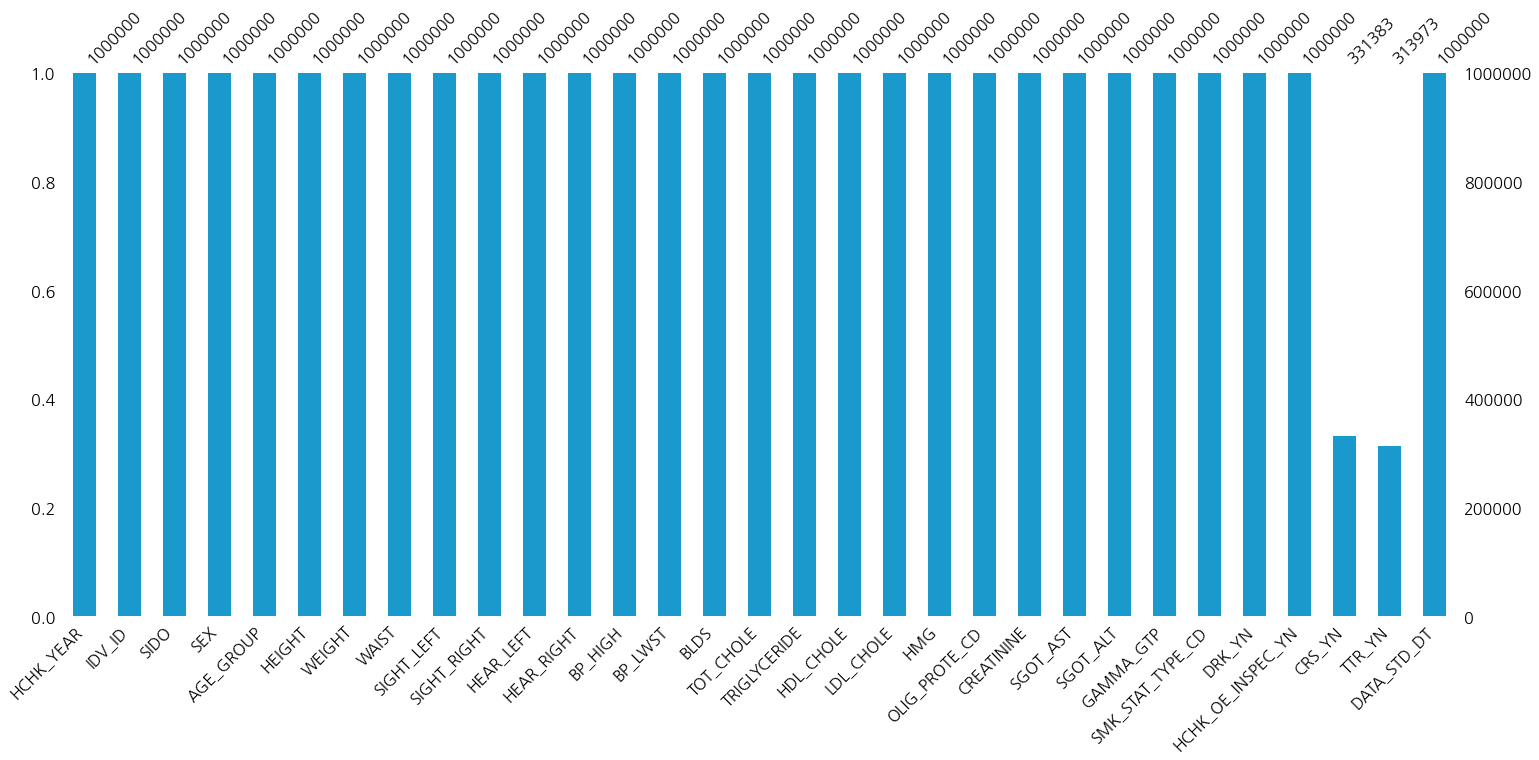

In [24]:
msno.bar(df=nh_x,  color=(0.1, 0.6, 0.8))

<AxesSubplot:xlabel='TOT_CHOLE', ylabel='BP_HIGH'>

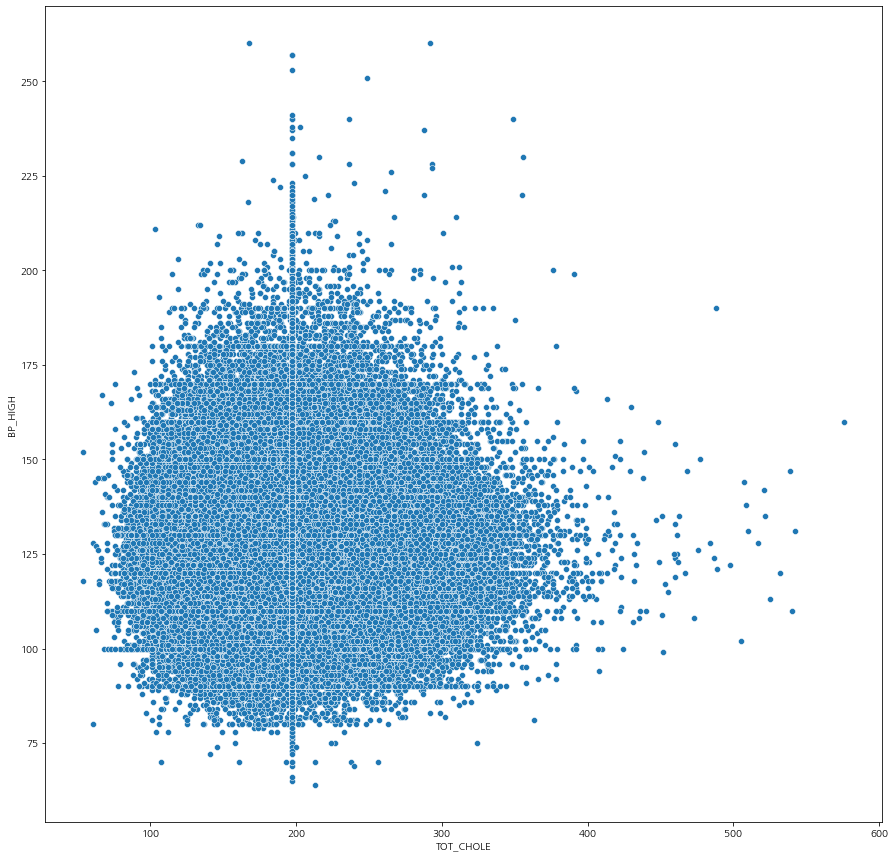

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(nh_x['TOT_CHOLE'], nh_x['BP_HIGH'])

In [60]:
# 치아우식증 여부에 따른 평균 건강상태의 차이
nh_x.dropna(subset=['CRS_YN']).groupby('CRS_YN').mean().transpose()

CRS_YN,0.0,1.0
HCHK_YEAR,2020.000000,2020.000000
IDV_ID,500525.257485,499281.735376
SIDO,33.527242,34.548990
SEX,1.450139,1.394466
AGE_GROUP,11.624928,11.256820
HEIGHT,161.891603,162.760704
WEIGHT,63.910440,65.179888
WAIST,82.587263,83.179904
SIGHT_LEFT,0.913995,0.923359
SIGHT_RIGHT,0.912540,0.925311


In [27]:
nh_x_crs=nh_x.dropna(subset=['CRS_YN'])
nh_x_crs

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN,DATA_STD_DT
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
7,2020,8,41,1,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,3.0,0.0,1,0.0,NaN,2021-12-29
12,2020,13,41,1,14,175,80,90.0,0.8,0.7,...,0.8,21.0,21.0,41.0,3.0,1.0,1,0.0,0.0,2021-12-29
16,2020,17,30,1,11,160,65,90.0,0.6,0.6,...,1.0,29.0,54.0,24.0,1.0,1.0,1,0.0,1.0,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999981,2020,999982,26,1,12,165,90,108.2,0.6,0.8,...,1.0,25.0,19.0,48.0,2.0,1.0,1,1.0,NaN,2021-12-29
999982,2020,999983,27,2,9,160,50,67.9,1.5,1.2,...,0.6,17.0,9.0,8.0,1.0,1.0,1,1.0,1.0,2021-12-29
999988,2020,999989,26,1,16,165,60,81.0,0.8,0.8,...,1.0,21.0,16.0,13.0,2.0,1.0,1,0.0,1.0,2021-12-29
999990,2020,999991,11,2,13,155,50,73.0,0.3,0.4,...,0.6,21.0,17.0,16.0,1.0,0.0,1,0.0,1.0,2021-12-29


In [28]:
nh_x_crs.iloc[:,3:-1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331383 entries, 3 to 999993
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                331383 non-null  int64  
 1   AGE_GROUP          331383 non-null  int64  
 2   HEIGHT             331383 non-null  int64  
 3   WEIGHT             331383 non-null  int64  
 4   WAIST              331383 non-null  float64
 5   SIGHT_LEFT         331383 non-null  float64
 6   SIGHT_RIGHT        331383 non-null  float64
 7   HEAR_LEFT          331383 non-null  float64
 8   HEAR_RIGHT         331383 non-null  float64
 9   BP_HIGH            331383 non-null  float64
 10  BP_LWST            331383 non-null  float64
 11  BLDS               331383 non-null  float64
 12  TOT_CHOLE          331383 non-null  float64
 13  TRIGLYCERIDE       331383 non-null  float64
 14  HDL_CHOLE          331383 non-null  float64
 15  LDL_CHOLE          331383 non-null  float64
 16  HM

- 치아우식증 여부 컬럼이 존재하는 데이터만 뽑고 보니  콜레스테롤 관련 수치들의 데이터가 굉장히 적어짐

### 이상치 처리 후 치아우식증 여부에 따른 건강상태 평균의 차이 t-test

In [63]:
col=nh_x_crs.iloc[:,5:-6].columns.to_list()
for i in col:
    globals()[f'col_{i}_0_s'] = nh_x_crs[nh_x_crs['CRS_YN'] == 0][i].dropna()
    globals()[f'col_{i}_1_s'] = nh_x_crs[nh_x_crs['CRS_YN'] == 1][i].dropna()
    if f'col_{i}_0' in globals() and f'col_{i}_1' in globals():
        t, p = stats.ttest_ind(globals()[f'col_{i}_0_s'], globals()[f'col_{i}_1_s'], equal_var=False)
        print(f'{i}의 t-statistic: ', t)
        print(f'{i}의 p-value: ', p)
        if p < 0.01:  # 유의수준 0.01로 설정
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하다.____________****')
        else:
            print(f'치아우식증 여부에 따라 {i}의 평균의 차이는 유의하지 않다.')
        print('----------------------------------------')    

HEIGHT의 t-statistic:  -20.35738682199124
HEIGHT의 p-value:  6.859641064263599e-92
치아우식증 여부에 따라 HEIGHT의 평균의 차이는 유의하다.____________****
----------------------------------------
WEIGHT의 t-statistic:  -21.555295129491686
WEIGHT의 p-value:  9.440129418765651e-103
치아우식증 여부에 따라 WEIGHT의 평균의 차이는 유의하다.____________****
----------------------------------------
WAIST의 t-statistic:  -13.276165066049241
WAIST의 p-value:  3.516421291204495e-40
치아우식증 여부에 따라 WAIST의 평균의 차이는 유의하다.____________****
----------------------------------------
SIGHT_LEFT의 t-statistic:  -6.211219660681013
SIGHT_LEFT의 p-value:  5.283673128641231e-10
치아우식증 여부에 따라 SIGHT_LEFT의 평균의 차이는 유의하다.____________****
----------------------------------------
SIGHT_RIGHT의 t-statistic:  -8.524934173762105
SIGHT_RIGHT의 p-value:  1.555540727343352e-17
치아우식증 여부에 따라 SIGHT_RIGHT의 평균의 차이는 유의하다.____________****
----------------------------------------
HEAR_LEFT의 t-statistic:  3.6487690955746466
HEAR_LEFT의 p-value:  0.00026366309010043777
치아우식증 여부에 따라 HEAR_LE

In [64]:
col=nh_x_crs.iloc[:,5:-6].columns.to_list()
for i in col:
    globals()[f'col_{i}_0'] = nh_x_crs[nh_x_crs['CRS_YN'] == 0][i].dropna()
    globals()[f'col_{i}_1'] = nh_x_crs[nh_x_crs['CRS_YN'] == 1][i].dropna()
    if f'col_{i}_0' in globals() and f'col_{i}_1' in globals():
        u, p = stats.mannwhitneyu(globals()[f'col_{i}_0'], globals()[f'col_{i}_1'], alternative='two-sided')
        print(f'{i}의 U-statistic: ', u)
        print(f'{i}의 p-value: ', p)
        if p < 0.05:  # 유의수준 0.05로 설정
            print(f'치아우식증 여부에 따라 {i}의 중앙값 차이는 통계적으로 유의미합니다.--------******')
        else:
            print(f'치아우식증 여부에 따라 {i}의 중앙값 차이는 유의하지 않다.')
        print('----------------------------------------')

HEIGHT의 U-statistic:  7269604319.5
HEIGHT의 p-value:  1.772199845592296e-97
치아우식증 여부에 따라 HEIGHT의 중앙값 차이는 통계적으로 유의미합니다.--------******
----------------------------------------
WEIGHT의 U-statistic:  7278510802.5
WEIGHT의 p-value:  1.1551297903700942e-92
치아우식증 여부에 따라 WEIGHT의 중앙값 차이는 통계적으로 유의미합니다.--------******
----------------------------------------
WAIST의 U-statistic:  7440933160.0
WAIST의 p-value:  3.1313935011325793e-35
치아우식증 여부에 따라 WAIST의 중앙값 차이는 통계적으로 유의미합니다.--------******
----------------------------------------
SIGHT_LEFT의 U-statistic:  7550071666.5
SIGHT_LEFT의 p-value:  7.849480463227984e-13
치아우식증 여부에 따라 SIGHT_LEFT의 중앙값 차이는 통계적으로 유의미합니다.--------******
----------------------------------------
SIGHT_RIGHT의 U-statistic:  7510804868.0
SIGHT_RIGHT의 p-value:  9.85098140507404e-20
치아우식증 여부에 따라 SIGHT_RIGHT의 중앙값 차이는 통계적으로 유의미합니다.--------******
----------------------------------------
HEAR_LEFT의 U-statistic:  7724051220.0
HEAR_LEFT의 p-value:  0.00036359368573211286
치아우식증 여부에 따라 HEAR_LEFT의 중앙값 

- 이상치를 제거한 후 t-test를 진행하니 다른 결과가 나온다.
- 그렇지만 여전히 대부분의 변수에서 치아우식증 여부가 유의한 차이를 만들어낸다.
- 이에 대해서는 추가적인 분석이 필요할 듯하다.

In [65]:
col=nh_crs.iloc[:,3:-6].columns.to_list()
for i in col:
    globals()[f'col_{i}_0'] = nh_x_crs[nh_x_crs['CRS_YN'] == 0][i].dropna()
    globals()[f'col_{i}_1'] = nh_x_crs[nh_x_crs['CRS_YN'] == 1][i].dropna()
    if f'col_{i}_0' in globals() and f'col_{i}_1' in globals():
        u, p = stats.mannwhitneyu(globals()[f'col_{i}_0'], globals()[f'col_{i}_1'], alternative='two-sided')
        print(f'{i}의 U-statistic: ', u)
        print(f'{i}의 p-value: ', p)
        if p < 0.05:  # 유의수준 0.05로 설정
            print(f'치아우식증 여부에 따라 {i}의 중앙값은 통계적으로 유의미하게 다르다.--------******')
        else:
            print(f'치아우식증 여부에 따라 {i}의 중앙값은 통계적으로 유의미하게 다르지 않습니다.')
        print('----------------------------------------')

SEX의 U-statistic:  8124710905.0
SEX의 p-value:  4.8609353715342154e-129
치아우식증 여부에 따라 SEX의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
AGE_GROUP의 U-statistic:  8574279009.0
AGE_GROUP의 p-value:  0.0
치아우식증 여부에 따라 AGE_GROUP의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
HEIGHT의 U-statistic:  7269604319.5
HEIGHT의 p-value:  1.772199845592296e-97
치아우식증 여부에 따라 HEIGHT의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
WEIGHT의 U-statistic:  7278510802.5
WEIGHT의 p-value:  1.1551297903700942e-92
치아우식증 여부에 따라 WEIGHT의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
WAIST의 U-statistic:  7440933160.0
WAIST의 p-value:  3.1313935011325793e-35
치아우식증 여부에 따라 WAIST의 중앙값은 통계적으로 유의미하게 다르다.--------******
----------------------------------------
SIGHT_LEFT의 U-statistic:  7550071666.5
SIGHT_LEFT의 p-value:  7.849480463227984e-13
치아우식증 여부에 따라 SIGHT_LEFT의 중앙값은 통계적으로 유의미하게 다르다.--------******
--------

### 치아우식증 여부와 범주형 변수들 간의 카이제곱검정

In [66]:
# 범주형 변수 컬럼 리스트
col_c=nh_crs.iloc[:,-6:-1].columns.to_list()
col_c.extend(['SIDO','SEX','AGE_GROUP','HEAR_LEFT','HEAR_RIGHT','OLIG_PROTE_CD'])
col_c.remove('CRS_YN')
col_c.remove('HCHK_OE_INSPEC_YN')
col_c

['SMK_STAT_TYPE_CD',
 'DRK_YN',
 'TTR_YN',
 'SIDO',
 'SEX',
 'AGE_GROUP',
 'HEAR_LEFT',
 'HEAR_RIGHT',
 'OLIG_PROTE_CD']

In [67]:
from scipy.stats import chi2_contingency

for c in col_c:
    contingency_table = pd.crosstab(nh_x_crs['CRS_YN'], nh_x_crs[c])
    chi2, pval, dof, expected = chi2_contingency(contingency_table)

    print(c)
    print(f"chi2 statistic: {chi2:.4f}")
    print(f"p-value: {pval:.4f}")
    print('---------------------------')

SMK_STAT_TYPE_CD
chi2 statistic: 2289.9107
p-value: 0.0000
---------------------------
DRK_YN
chi2 statistic: 220.1457
p-value: 0.0000
---------------------------
TTR_YN
chi2 statistic: 8237.5094
p-value: 0.0000
---------------------------
SIDO
chi2 statistic: 1083.4600
p-value: 0.0000
---------------------------
SEX
chi2 statistic: 583.8554
p-value: 0.0000
---------------------------
AGE_GROUP
chi2 statistic: 2084.5833
p-value: 0.0000
---------------------------
HEAR_LEFT
chi2 statistic: 12.6350
p-value: 0.0004
---------------------------
HEAR_RIGHT
chi2 statistic: 11.9363
p-value: 0.0006
---------------------------
OLIG_PROTE_CD
chi2 statistic: 31.2153
p-value: 0.0000
---------------------------


- 카이제곱 검정결과 치아우식증 여부와 위의 모든 컬럼에서 유의미한 관계가 있다.
- 치석, 흡연 여부, 연령대, 시도, 성별, 음주 여부, 요단백, 왼쪽 청력, 오른쪽 청력 순으로

In [30]:
nh_x_crs_drop = nh_x_crs.copy()
nh_x_crs_drop.dropna(inplace = True)

In [31]:
nh_x_crs_drop.iloc[:,6:-1]

,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN
3,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,197.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
6,80,93.0,0.8,0.7,1.0,2.0,112.0,73.0,250.0,119.0,...,1.0,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0
12,80,90.0,0.8,0.7,1.0,1.0,130.0,80.0,114.0,197.0,...,1.0,0.8,21.0,21.0,41.0,3.0,1.0,1,0.0,0.0
16,65,90.0,0.6,0.6,1.0,1.0,138.0,88.0,94.0,223.0,...,1.0,1.0,29.0,54.0,24.0,1.0,1.0,1,0.0,1.0
21,50,65.9,0.7,1.0,1.0,1.0,114.0,73.0,94.0,254.0,...,1.0,0.8,24.0,14.0,12.0,1.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999979,70,85.0,1.2,1.2,1.0,1.0,108.0,51.0,153.0,197.0,...,4.0,1.0,18.0,17.0,22.0,3.0,1.0,1,0.0,1.0
999982,50,67.9,1.5,1.2,1.0,1.0,105.0,65.0,92.0,197.0,...,1.0,0.6,17.0,9.0,8.0,1.0,1.0,1,1.0,1.0
999988,60,81.0,0.8,0.8,1.0,1.0,116.0,72.0,96.0,197.0,...,1.0,1.0,21.0,16.0,13.0,2.0,1.0,1,0.0,1.0
999990,50,73.0,0.3,0.4,1.0,1.0,123.0,74.0,88.0,197.0,...,1.0,0.6,21.0,17.0,16.0,1.0,0.0,1,0.0,1.0


In [32]:
col_x = nh_x_crs_drop.iloc[:,6:-1].columns.to_list()
col_x.remove('TOT_CHOLE')
col_x.remove('TRIGLYCERIDE')
col_x.remove('HDL_CHOLE')
col_x.remove('LDL_CHOLE')
col_x.remove('HCHK_OE_INSPEC_YN')
col_x

['WEIGHT',
 'WAIST',
 'SIGHT_LEFT',
 'SIGHT_RIGHT',
 'HEAR_LEFT',
 'HEAR_RIGHT',
 'BP_HIGH',
 'BP_LWST',
 'BLDS',
 'HMG',
 'OLIG_PROTE_CD',
 'CREATININE',
 'SGOT_AST',
 'SGOT_ALT',
 'GAMMA_GTP',
 'SMK_STAT_TYPE_CD',
 'DRK_YN',
 'CRS_YN',
 'TTR_YN']

## 로지스틱 회귀분석 (치아검진 포함, MinMax 스케일링)

In [71]:
from sklearn.preprocessing import MinMaxScaler
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_x_crs_drop[col_x].drop('CRS_YN', axis=1)  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# MinMax스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.6111725611427815
오차 행렬:
 [[28223 24742]
 [16387 36425]]


## 로지스틱 회귀분석 (치아검진 포함, Standard 스케일링)

In [72]:
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X = nh_x_crs_drop.iloc[:,3:-1].drop('CRS_YN', axis=1)  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# StandardScaler를 이용한 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.6151620862758445
오차 행렬:
 [[29274 23691]
 [17016 35796]]


- Minmax 보다 standard 스케일링을 하였을때 정확도가 미미하게 높다..

## 로지스틱 회귀분석 (치아검진 포함, 스케일링 X)

In [73]:
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_x_crs_drop.iloc[:,3:-1].drop('CRS_YN', axis=1)  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.6067481588625127
오차 행렬:
 [[30810 22155]
 [19442 33370]]


In [74]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 포함):
AGE_GROUP: -0.137375409644321
TTR_YN: 0.08271405264881297
SEX: -0.03625886174365378
SMK_STAT_TYPE_CD: 0.03148033762148253
WAIST: 0.024389064938769512
WEIGHT: -0.021912458129923592
HMG: 0.010247830094759845
BP_HIGH: 0.005065255466858581
SIGHT_LEFT: -0.0023625269168882543
HEAR_RIGHT: 0.002286071169635464
SGOT_ALT: -0.0020216260003043506
HEAR_LEFT: 0.001968349088775235
HDL_CHOLE: -0.0015694608044841867
SGOT_AST: 0.0014447626888698275
HEIGHT: 0.0013005246777869311
BLDS: 0.0011130382262424274
CREATININE: -0.000866885163237753
SIGHT_RIGHT: -0.0008260228264304714
HCHK_OE_INSPEC_YN: 0.0006858138749504529
OLIG_PROTE_CD: -0.00063928435660136
BP_LWST: -0.0005639910510996424
GAMMA_GTP: 0.00042730139685767687
TOT_CHOLE: -0.00035789008498817283
DRK_YN: 0.00010332556174018362
LDL_CHOLE: -7.895092700326749e-05
TRIGLYCERIDE: -3.9342158701108675e-05


- 첫번째로 계수가 높은 변수는 치석
- 두번째로 계수가 높은 변수는 성별
- 세번째로 계수가 높은 변수는 흡연 여부
- 네번째로 계수가 높은 변수는 연령대
- 다섯번째로 계수가 높은 변수는 왼쪽 시력??????

## 로지스틱 회귀분석 (치아검진 불포함)

In [75]:
# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_x_crs_drop.iloc[:,3:-4]  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

# 다중 로지스틱 회귀모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.5946377756979305
오차 행렬:
 [[29887 23078]
 [19800 33012]]


In [76]:
# 회귀계수 및 독립변수 이름 추출
coef = model.coef_[0]
features = X.columns

# 회귀계수의 크기를 절댓값으로 변환하여 내림차순 정렬한 인덱스 추출
sorted_idx = np.argsort(np.abs(coef))[::-1]

# 회귀계수가 큰 순서대로 독립변수 이름과 회귀계수 출력
print("회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):")
for i in sorted_idx:
    print(f"{features[i]}: {coef[i]}")

회귀계수 (Coefficients)의 크기가 큰 순서대로(치아검진 불포함):
AGE_GROUP: -0.13833674980241942
SEX: -0.05029135500740457
SMK_STAT_TYPE_CD: 0.03992250948357345
WAIST: 0.01918745517762323
WEIGHT: -0.01749565958397528
HMG: 0.010958064875024794
BP_HIGH: 0.006806451437761416
SIGHT_LEFT: -0.005786169664756422
HEAR_RIGHT: 0.004802525744485862
HEAR_LEFT: 0.0043612511615606555
BP_LWST: -0.004190174923148076
DRK_YN: -0.003749124431258437
SIGHT_RIGHT: -0.00351732028361449
HEIGHT: 0.0017348715143646347
BLDS: 0.0013288721677111783
LDL_CHOLE: 0.0011595037667846374
SGOT_ALT: -0.0010190399690297586
OLIG_PROTE_CD: -0.0008823580766148419
HDL_CHOLE: -0.0007217030801297234
CREATININE: -0.000491109635278776
SGOT_AST: 0.00048348980991535086
TOT_CHOLE: -0.0004551214745941901
GAMMA_GTP: 0.0002918679384338878
TRIGLYCERIDE: 2.9231910418530703e-05


### 치아검진 데이터를 불포함 한후 
- 첫번째로 계수가 높은 변수는 성별
- 두번째로 계수가 높은 변수는 연령대
- 세번째로 계수가 높은 변수는 흡연여부
- 네번째로 계수가 높은 변수는 왼쪽 시력????
- 다섯번째로 계수가 높은 변수는 음주 여부

from sklearn import svm

# 데이터 준비
# X는 독립변수, y는 종속변수

X = nh_x_crs_drop.iloc[:, 3:-1].drop('CRS_YN', axis=1)  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

# SVM 모델 학습
model = svm.SVC(kernel='rbf', gamma='scale', probability=True)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

## 랜덤포레스트(치아검진 포함, standard 스케일링) 

In [34]:
from imblearn.over_sampling import SMOTE

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#데이터 준비
#X는 독립변수, y는 종속변수
X = nh_x_crs_drop.iloc[:, 3:-1].drop('CRS_YN', axis=1) # 독립변수
y = nh_x_crs_drop['CRS_YN'] # 종속변수

# StandardScaler를 이용한 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

#랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=622)
model.fit(X_train, y_train)

#테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

#예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.9137808786409144
오차 행렬:
 [[52731   234]
 [ 8886 43926]]


## 랜덤포레스트(치아검진 포함, MinMax 스케일링) 

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#데이터 준비
#X는 독립변수, y는 종속변수
X = nh_x_crs_drop.iloc[:, 3:-1].drop('CRS_YN', axis=1) # 독립변수
y = nh_x_crs_drop['CRS_YN'] # 종속변수

# MinMax스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

#랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=622)
model.fit(X_train, y_train)

#테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

#예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.9167304801610936
오차 행렬:
 [[52304   661]
 [ 8147 44665]]


## 랜덤포레스트(치아검진 포함, 스케일링X) 

In [43]:
#데이터 준비
#X는 독립변수, y는 종속변수
X = nh_x_crs_drop.iloc[:, 3:-1].drop('CRS_YN', axis=1) # 독립변수
y = nh_x_crs_drop['CRS_YN'] # 종속변수

#SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X, y)

#데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

#랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=622)
model.fit(X_train, y_train)

#테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

#예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.9072104521776946
오차 행렬:
 [[52811   154]
 [ 9661 43151]]


## 랜덤포레스트(치아검진 불포함, 스케일링X) 

In [44]:
# 불포함
#데이터 준비
#X는 독립변수, y는 종속변수
X = nh_x_crs_drop.iloc[:,3:-4]  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

#SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X, y)

#데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

#랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=622)
model.fit(X_train, y_train)

#테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

#예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.9071442752205111
오차 행렬:
 [[52914    51]
 [ 9771 43041]]


## 랜덤포레스트(치아검진 불포함, MinMax 스케일링) 

In [45]:
# 불포함
# MinMax
#데이터 준비
#X는 독립변수, y는 종속변수
X = nh_x_crs_drop.iloc[:,3:-4]  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# MinMax스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

#랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=622)
model.fit(X_train, y_train)

#테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

#예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.9155960180379478
오차 행렬:
 [[52684   281]
 [ 8647 44165]]


## 랜덤포레스트(치아검진 불포함, Standard 스케일링) 

In [46]:
# 불포함
# Standard
#데이터 준비
#X는 독립변수, y는 종속변수
X = nh_x_crs_drop.iloc[:,3:-4]  # 독립변수
y = nh_x_crs_drop['CRS_YN']  # 종속변수

# StandardScaler를 이용한 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#SMOTE를 이용한 데이터 증강
smote = SMOTE(random_state=622)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#데이터 분할 (학습 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=622)

#랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=622)
model.fit(X_train, y_train)

#테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

#예측 결과 평가
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("정확도: ", accuracy)
print("오차 행렬:\n", confusion_mat)

정확도:  0.9113039696720459
오차 행렬:
 [[52916    49]
 [ 9333 43479]]


## 연령대별 건강 통계

In [25]:
nh_x.iloc[:,4:-1]

,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGOT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTR_YN
0,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN
1,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN
2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN
3,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
4,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,...,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,13,145,55,81.0,0.9,1.0,1.0,1.0,132.0,78.0,...,1.0,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN
999996,12,160,55,76.5,1.5,1.5,1.0,1.0,100.0,64.0,...,1.0,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN
999997,9,175,70,85.0,1.2,1.2,1.0,1.0,110.0,64.0,...,1.0,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN
999998,9,160,70,91.0,0.6,0.5,1.0,1.0,137.0,82.0,...,1.0,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN


In [26]:
nh_x.iloc[:,12:-6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   BP_HIGH        1000000 non-null  float64
 1   BP_LWST        1000000 non-null  float64
 2   BLDS           1000000 non-null  float64
 3   TOT_CHOLE      1000000 non-null  float64
 4   TRIGLYCERIDE   1000000 non-null  float64
 5   HDL_CHOLE      1000000 non-null  float64
 6   LDL_CHOLE      1000000 non-null  float64
 7   HMG            1000000 non-null  float64
 8   OLIG_PROTE_CD  1000000 non-null  float64
 9   CREATININE     1000000 non-null  float64
 10  SGOT_AST       1000000 non-null  float64
 11  SGOT_ALT       1000000 non-null  float64
 12  GAMMA_GTP      1000000 non-null  float64
dtypes: float64(13)
memory usage: 99.2 MB


In [27]:
col_1 = nh_x.iloc[:,12:-6].columns.to_list()
col_1.append('AGE_GROUP')
nh_k=nh_x[col_1]

In [28]:
# ANOVA 분산분석
from scipy.stats import f_oneway

groups = nh_k.groupby("AGE_GROUP")

for col in nh_k.columns:
    data = [group[col].dropna() for name, group in groups]
    f_statistic, p_value = f_oneway(*data)
    print(col + ": F-statistic = {0:.3g}, p-value = {1:.3g}".format(f_statistic, p_value))

BP_HIGH: F-statistic = 6.13e+03, p-value = 0
BP_LWST: F-statistic = 398, p-value = 0
BLDS: F-statistic = 1.65e+03, p-value = 0
TOT_CHOLE: F-statistic = 2.14e+03, p-value = 0
TRIGLYCERIDE: F-statistic = 310, p-value = 0
HDL_CHOLE: F-statistic = 436, p-value = 0
LDL_CHOLE: F-statistic = 1.55e+03, p-value = 0
HMG: F-statistic = 3.63e+03, p-value = 0
OLIG_PROTE_CD: F-statistic = 122, p-value = 4.12e-230
CREATININE: F-statistic = 900, p-value = 0
SGOT_AST: F-statistic = 810, p-value = 0
SGOT_ALT: F-statistic = 1.05e+03, p-value = 0
GAMMA_GTP: F-statistic = 668, p-value = 0
AGE_GROUP: F-statistic = inf, p-value = 0


In [29]:
from scipy.stats import shapiro, levene

groups = nh_k.groupby("AGE_GROUP")

for col in nh_k.columns:
    for name, group in groups:
        data = group[col].dropna()
        # 정규성 검정
        stat, p = shapiro(data)
        if p >0.05:
            print("Group {0} - {1}: Shapiro-Wilk test, p-value = {2:.3g}".format(name, col, p))
        # 등분산성 검정
        stat, p = levene(*[g[col].dropna() for n, g in groups])
        if p>0.05: 
            print("Levene's test for {0}: F-statistic = {1:.3g}, p-value = {2:.3g}".format(col, stat, p))

Group 9 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 10 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 11 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 12 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 13 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 14 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 15 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 16 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 17 - AGE_GROUP: Shapiro-Wilk test, p-value = 1
Group 18 - AGE_GROUP: Shapiro-Wilk test, p-value = 1


- 정규성을 만족하는 경우가 같은 연령대 
- 등분산성을 만족하는 경우는 없음

In [30]:
from scipy.stats import kruskal

groups = nh_k.groupby("AGE_GROUP")

for col in nh_k.columns:
    data = [group[col].dropna() for name, group in groups]
    statistic, p_value = kruskal(*data)
    if p_value < 0.05:
        print(col + ": Kruskal-Wallis test statistic = {0:.3g}, p-value = {1:.3g}".format(statistic, p_value))
        print('적어도 한 그룹의 중앙값이 다른 그룹과 유의미하게 다르다')
        print('--------------------------------------------------------------')
    else:
        print(col + ": Kruskal-Wallis test statistic = {0:.3g}, p-value = {1:.3g}".format(statistic, p_value))
        print('모든 그룹에서 중앙값이 같다')
        print('--------------------------------------------------------------')

BP_HIGH: Kruskal-Wallis test statistic = 5.29e+04, p-value = 0
적어도 한 그룹의 중앙값이 다른 그룹과 유의미하게 다르다
--------------------------------------------------------------
BP_LWST: Kruskal-Wallis test statistic = 3.66e+03, p-value = 0
적어도 한 그룹의 중앙값이 다른 그룹과 유의미하게 다르다
--------------------------------------------------------------
BLDS: Kruskal-Wallis test statistic = 2.68e+04, p-value = 0
적어도 한 그룹의 중앙값이 다른 그룹과 유의미하게 다르다
--------------------------------------------------------------
TOT_CHOLE: Kruskal-Wallis test statistic = 1.55e+04, p-value = 0
적어도 한 그룹의 중앙값이 다른 그룹과 유의미하게 다르다
--------------------------------------------------------------
TRIGLYCERIDE: Kruskal-Wallis test statistic = 297, p-value = 1.29e-58
적어도 한 그룹의 중앙값이 다른 그룹과 유의미하게 다르다
--------------------------------------------------------------
HDL_CHOLE: Kruskal-Wallis test statistic = 3e+03, p-value = 0
적어도 한 그룹의 중앙값이 다른 그룹과 유의미하게 다르다
--------------------------------------------------------------
LDL_CHOLE: Kruskal-Wallis test statistic = 1.16

- 위의 변수들이 모두 유의함.
- 각 변수의 연령대별로 나눈 그룹들의 중앙값이 유의미하게 다르다.

In [31]:
# 연령대로 묶어서 각 컬럼들의 평균
nh_x.iloc[:,4:].groupby('AGE_GROUP').mean().transpose()

AGE_GROUP,9,10,11,12,13,14,15,16,17,18
HEIGHT,165.665453,164.119689,162.111551,160.653006,159.128217,157.810347,156.577041,154.966042,153.267382,150.440115
WEIGHT,67.240221,65.677141,63.903674,62.595556,61.504197,60.789298,59.730784,58.025530,55.841417,51.026134
WAIST,81.674163,81.405731,81.477878,81.969641,82.676757,83.763645,84.365334,84.679854,84.441994,82.103431
SIGHT_LEFT,1.061117,0.999412,0.955675,0.914189,0.839358,0.770292,0.703601,0.634067,0.576497,0.473240
SIGHT_RIGHT,1.059303,0.997114,0.956191,0.914163,0.840303,0.773008,0.707370,0.641317,0.583605,0.482748
HEAR_LEFT,1.006111,1.010030,1.016311,1.027764,1.043792,1.067684,1.110590,1.164744,1.218538,1.280423
HEAR_RIGHT,1.005785,1.008927,1.015549,1.026469,1.041864,1.063760,1.104851,1.157816,1.210846,1.281225
BP_HIGH,120.738247,121.982326,123.040619,124.557073,126.268743,128.324951,130.280015,131.836866,132.337592,130.996633
BP_LWST,76.410867,77.077807,77.392231,77.394626,76.979819,76.556842,76.003093,75.461064,75.238195,74.702902
BLDS,99.170671,101.298561,103.346376,105.430864,106.590860,107.278779,107.795873,107.914464,107.481902,106.594356


- 연령대가 높아질수록 수축기 혈압은 높아지지만 오히려 이완기 혈압은 낮아진다.
- 식전혈당이 제일 높은 연령대는 16(76 ~ 79세)
- 총콜레스테롤, HDL, LDL 이 제일 높은 연령대는 11(50 ~ 54세)
- 트리글리세라이드가 제일 높은 연령대는 12(55 ~ 59세)
- 헤모글로빈 수치는 연령대가 높을 수록 낮아진다.
- 요단백 수치가 제일 높은 연령대는 18(85세+)
- 크레아티닌 수치는 제일 낮은 연령대가 13(60 ~ 64세) 높은 연령대가 18(85세+)
- AST수치는 9(40 ~ 44세) 연령대에서 제일 낮고 연령대가 올라갈수록 수치도 올라가다가 14(65 ~ 69세) 연령대에서 제일 수치가 높고 그보다 높은 연령대에서 점점 수치가 내려간다.
- ALT수치는 12(55 ~ 59세)에서 제일 높은 수치를 기록하고 그보다 연령대가 높아질수록 수치는 낮아진다.
- 감마지티피 수치는 12(55 ~ 59세) 연령대에서 제일 높은 수치를 기록했고 점점 연령대가 올라갈수록 수치가 낮아진다.

- 연령대가 높아질수록 흡연 여부와 음주 여부 수치가 점점 내려간다.
- 치아우식증 여부 수치는 연령대가 내려갈 수록 점점 낮아지다가 14(65 ~ 69세)연령대에서 제일 낮은 수치를 기록하고 다시 점점 올라간다.

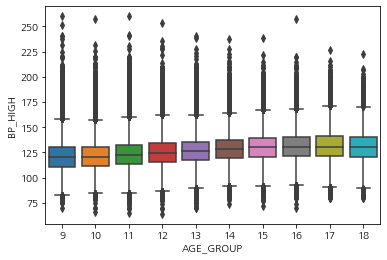

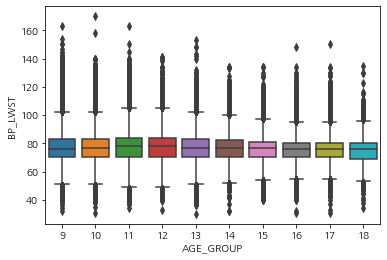

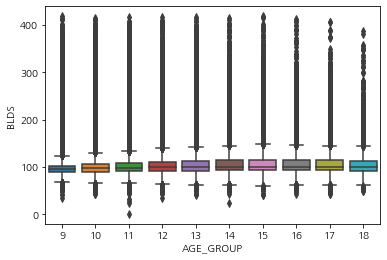

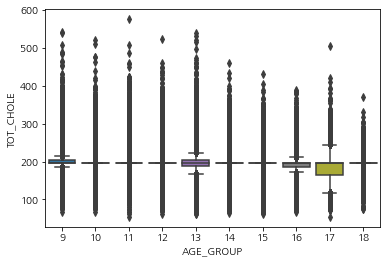

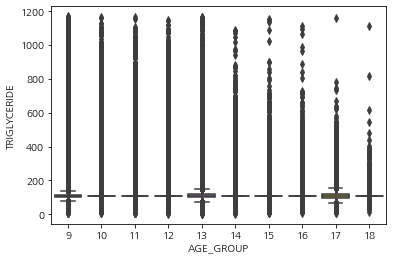

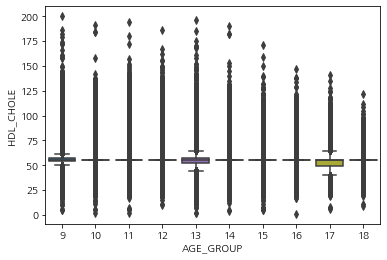

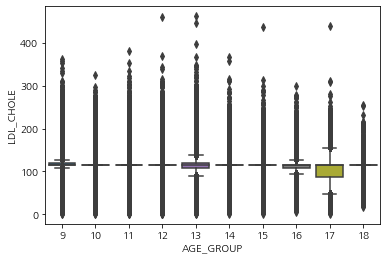

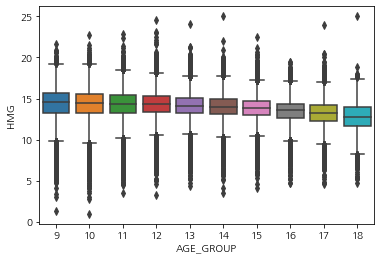

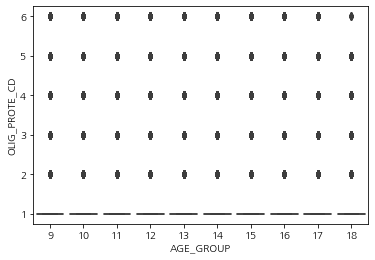

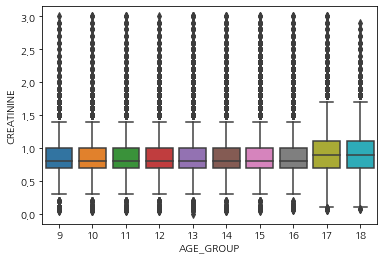

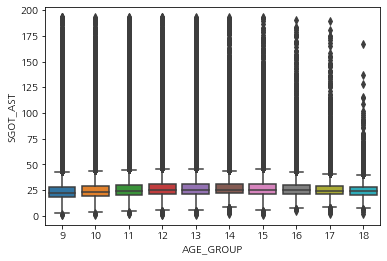

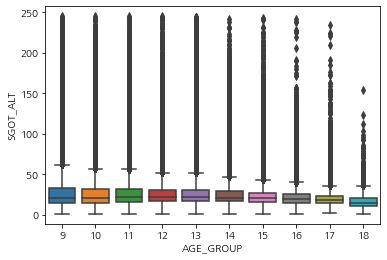

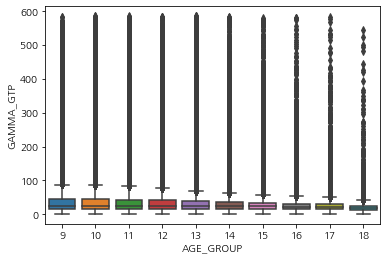

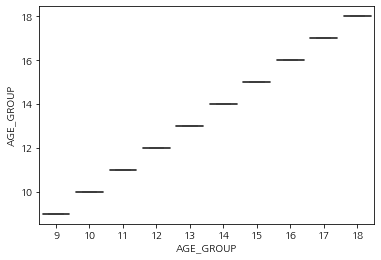

In [32]:
for c in col_1:
    sns.boxplot(x='AGE_GROUP', y=c, data = nh_k)
    plt.show()

### 10. 결론 Conclusion
- EDA 과정에서 발견한 결과와 인사이트를 요약합니다.

### 목적 1: 치아우식증 여부
- 치아우식증 여부와 가장 관련이 높은 변수는 치석 변수로 보인다. 그렇지만 이는 너무나도 당연한 결과로 보임.
- 치석 관리가 잘된 사람은 치과에 정기적으로 방문하여 관리를 받은 사람이므로 치아우식증에 걸릴 확률이 낮다는 것은 당연해 보임


- 구강검진 관련 변수를 제거하고 치아우식증 여부를 예측할 때 가장 높은 설명력을 지닌 변수는 성별이다.
- 남성의 경우가 치아우식증 발병 수치가 올라감.
- 



- 목적 2의 연령대별 건강 상태와 연관된 내용이다. 연령대가 올라갈 수록 치석여부 수치가 점점 내려갔다. 
- 치석여부와 치아우식증이 서로 연관이 높다 보니 이러한 결과가 나온 듯하다.
- 두번째로 높은 설명력을 지닌 변수는 흡연여부였다.

- 치아우식증 여부가 이진 변수이고 다중공선성 문제가 있다보니 로지스틱 회귀분석 모델을 선택함
- 하지만 문제가 로지스틱 회귀분석은 결측치가 있으면 제대로 실행이 안됨
- 구강검진 데이터는 전체의 약 33%정도 만 존재, 콜레스테롤 관련 수치는 전체의 약 40% 만 존재.
- 그런데 여기서 결측치들을 다 날리다 보니 11만 데이터 밖에 남지 않음.
- 이는 전체 구강검진 데이터의 약 3분의 1임. 데이터의 소실이 심함.
- 이 때문에 콜레스테롤 관련 수치의 결측치 또한 채워 줘야 겠다라고 생각이 듬
- 아니면 콜레스테롤 관련 변수는 이상치 처리 후 t-test에서 평균에 유의미한 차이를 보이지 않았기에 아예 변수에서 제외하는 것도 고려
- 결국 그냥 콜레스테롤 관련 변수들의 결측치를 중앙값으로 채움



#### 전체 데이터 중 구강검진을 받은 비율이 33% 밖에 안되므로 아예 구강검진 관련 변수들을 제거하고 나머지 변수들로만 치아우식증 여부를 예측하는 것이 좀더 의미있는 인사이트를 얻을 수 있을 듯하다. -> 만약 구강검진을 선택하지 않은 사람들 중 치아우식증 발생 가능성이 높은 사람에게 구강검진을 권유함

- t-test와 카이제곱검정에서 치아우식증 여부가 대부분의 변수에서 유의미한 차이를 만들어냈다.
- 처음에는 이상치때문인가 싶어 이상치 처리후에 한번더 테스트를 해보았지만 여전히 대부분의 변수에서 유의미한 차이를 만들어냈다.
- 이에 대해 추가적인 분석이 "매우 필요"할 듯하다!!!

#### !!!!!추측하기로는 치아우식증 여부가 각 연령대별로 의미있는 차이를 보이기에 이러한 결과가 나타난게 아닐까 싶다!!!!!
##### 연령대가 높아질수록 치아우식증 비율이 낮아짐  ->
##### 연령대가 높아질수록 키나, 몸무게, 혈압... 이러한 건강지표에 너무나도 당연히 유의미한 차이가 있음  ->
##### 그러다보니 치아우식증 여부가 전체적인 변수들에 모두 영향을 미침 

- 연령대별로 건강지표들의 차이를 알아보기 위해 ANOVA 분석 
- 연령대와 범주형 수치들의 카이제곱검정
- 꼭 점점 나이가 들수록 건강 지표들이 나빠지는 것만은 아니다.
- 연령대가 높아질수록 음주 여부와 흡연 여부 수치가 점점 낮아지는데 이 때문이 아닐까 싶다.
- 특정 몇몇 변수들에서는 연령대가 높아지면서 수치들이 안 좋아지는 듯 하다가 특정 연령대를 지나면 오히려 수치들이 좋아진다.
- 오히려 연령대가 높아질수록 치아우식증과 치석 여부에서 점점 좋은 수치를 보인다.
- 위의 카이제곱 검정에서 치석 다음으로 흡연여부가 치아우식증에 유의미한 차이를 보였는데 아무래도 연령대가 높아질 수록 흡연비율이 점점 낮아지다 보니 자연스레 구강 관련 지표들이 좋아진게 아닐까 싶다.